# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


##### Some functions which will be used later on

In [4]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Define the folder path where the PDF should be saved
output_folder = r"C:\Users\Lenovo\ML_Tutorial_Python\UpGrad AIML Asignments\Linear-Regression-main\Assignment\Delivery_Starter"

# Ensure the folder exists (optional, in case you want to create it if missing)
#os.makedirs(output_folder, exist_ok=True)

# Define the full path for the PDF file
pdf_filename = os.path.join(output_folder, "Susom_Bikash_Mukherjee_LR_Delivery_Time_Analysis_Plots.pdf")

# Create the PdfPages object to save multiple plots
pdf_pages = PdfPages(pdf_filename)

def save_plot_to_pdf(comment=None):
    global pdf_pages
    
    if comment:
        print(f" {comment}")  # Print the comment for clarity before saving
        
    pdf_pages.savefig()  # Save the current figure to the PDF
    print("Plot saved to PDF!")
    
# Call pdf_pages.close() when all plots are added to save the file properly
def finalize_pdf():
    global pdf_pages
    pdf_pages.close()
    print(f" PDF file '{pdf_filename}' has been created successfully!")


def save_text_to_pdf(text):
    # Function to save a text-based conclusion/remark as a separate page in the PDF
    global pdf_pages

    # Create a blank figure for text
    fig, ax = plt.subplots(figsize=(10, 3))  # Standard A4 page size
    ax.set_axis_off()  # Hide axes
    
    # Display the text
    ax.text(0.1, 0.9, "Conclusion/Remarks:", fontsize=16, fontweight="bold", transform=ax.transAxes)
    ax.text(0.1, 0.75, text, fontsize=12, transform=ax.transAxes, verticalalignment="top", wrap=True)

    # Save the figure with text to PDF
    pdf_pages.savefig(fig)
    print("Text remark saved to PDF!")

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [5]:
# Importing the file porter_data_1.csv
df_del_time = pd.read_csv("porter_data_1.csv")

In [6]:
# Check the head of the dataset
df_del_time.head()

market_id       created_at actual_delivery_time  store_primary_category  \
0          1   2/6/2015 22:24       2/6/2015 23:11                       4   
1          2  2/10/2015 21:49      2/10/2015 22:33                      46   
2          2   2/16/2015 0:11       2/16/2015 1:06                      36   
3          1   2/12/2015 3:36       2/12/2015 4:35                      38   
4          1   1/27/2015 2:12       1/27/2015 2:58                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  
0                        21     34.44  
1                         2     27.60  
2                        18     11.56  
3                         8     31.80  
4                         7      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

In [7]:
# Checking data type
df_del_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  int64  
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  int64  
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  int64  
 11  total_busy_dashers        175777 non-null  int64  
 12  total_outstanding_orders  175777 non-null  int64  
 13  distance                  175777 non-null  f

In [8]:
# Checking data type
df_del_time.shape

(175777, 14)

In [9]:
# Checking Null values
df_del_time.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [10]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

# making sure it doesn't fail even if there are bad/malformed dates, and it will set invalid parses to NaT (Not a Time)
df_del_time['created_at'] = pd.to_datetime(df_del_time['created_at'], errors='coerce')
df_del_time['actual_delivery_time'] = pd.to_datetime(df_del_time['actual_delivery_time'], errors='coerce')

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [11]:
print( df_del_time["market_id"].nunique() )
print( df_del_time["order_protocol"].nunique() )
print( df_del_time["store_primary_category"].nunique())
print( df_del_time["total_items"].nunique())
print( df_del_time["num_distinct_items"].nunique())
df_del_time.shape

6
7
73
54
20


(175777, 14)

In [12]:
# Convert categorical features to category type

df_del_time['market_id'] = df_del_time['market_id'].astype(int)
df_del_time['order_protocol'] = df_del_time['order_protocol'].astype(int)


In [13]:
# Checking data after conversion
df_del_time.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0          1 2015-02-06 22:24:00  2015-02-06 23:11:00                       4   
1          2 2015-02-10 21:49:00  2015-02-10 22:33:00                      46   
2          2 2015-02-16 00:11:00  2015-02-16 01:06:00                      36   
3          1 2015-02-12 03:36:00  2015-02-12 04:35:00                      38   
4          1 2015-01-27 02:12:00  2015-01-27 02:58:00                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  
0                        21     34.44  
1                         2     27.60  
2                        18     11.56  
3                         8     31.80  
4                         7      8.20

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [14]:
# Calculate time taken in minutes
df_del_time['time_taken'] = df_del_time['actual_delivery_time'] - df_del_time['created_at'] 

# Convert to total seconds
#df_del_time['time_taken'] = df_del_time['time_taken'].dt.total_seconds()

# Then format back into HH:MM:SS
#df_del_time['time_taken'] = pd.to_datetime(df_del_time['time_taken'], unit='s').dt.strftime('%H:%M:%S')
df_del_time['time_taken_minutes'] = df_del_time['time_taken'].dt.total_seconds()/ 60   # Converting into minute
df_del_time['time_taken_minutes'] = df_del_time['time_taken_minutes'].astype(int)       # I don't want decimal

df_del_time.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0          1 2015-02-06 22:24:00  2015-02-06 23:11:00                       4   
1          2 2015-02-10 21:49:00  2015-02-10 22:33:00                      46   
2          2 2015-02-16 00:11:00  2015-02-16 01:06:00                      36   
3          1 2015-02-12 03:36:00  2015-02-12 04:35:00                      38   
4          1 2015-01-27 02:12:00  2015-01-27 02:58:00                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance      time_taken  time_taken_minutes  
0                        21     34.44 0 days 00:47:00                  47  
1                         2     27.60 0 days 00:44:00                  44  
2                        18     11.56 0 days 00:55:00                  55  
3                         8     31.80 0 days 00:59:00                  59  
4                         7      8.20 0 days 00:46:00                  46

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [15]:
# Extract the hour and day of week from the 'created_at' timestamp

# 1. Extract weekday name
df_del_time['day_of_week'] = df_del_time['created_at'].dt.day_name()

# 2. Extract time in 24-hour format (HH:MM)

# Step 1: If needed, format as string first
df_del_time['created_at_time'] = df_del_time['created_at'].dt.strftime('%H:%M')

# Step 2: Convert string back to datetime64[ns], using a dummy date (like today's date)
df_del_time['created_at_time'] = pd.to_datetime(df_del_time['created_at_time'], format='%H:%M')


########################################## May be used in analysis later on ################################
# 3. Extract year (like 2025)
df_del_time['year'] = df_del_time['created_at'].dt.year


# 4. Extract month name (like 'January', 'February', etc.)
#df_del_time['month'] = df_del_time['created_at'].dt.month_name()  # it will return month name so not using
df_del_time['month'] = df_del_time['created_at'].dt.month          # it will return month as 1 to 12


# 5. Extract just the date part (YYYY-MM-DD)
df_del_time['date'] = df_del_time['created_at'].dt.day

# Create a categorical feature 'isWeekend'
df_del_time['isWeekend'] = df_del_time['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Chanding the Day name to number
# Create a mapping dictionary
day_to_num = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

# Replace day_of_week using the map
df_del_time['day_of_week'] = df_del_time['day_of_week'].map(day_to_num)


df_del_time.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0          1 2015-02-06 22:24:00  2015-02-06 23:11:00                       4   
1          2 2015-02-10 21:49:00  2015-02-10 22:33:00                      46   
2          2 2015-02-16 00:11:00  2015-02-16 01:06:00                      36   
3          1 2015-02-12 03:36:00  2015-02-12 04:35:00                      38   
4          1 2015-01-27 02:12:00  2015-01-27 02:58:00                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  ...  total_outstanding_orders  distance      time_taken  \
0            1239  ...                        21     34.44 0 days 00:47:00   
1            1400  ...                         2     27.60 0 days 00:44:00   
2            1604  ...                        18     11.56 0 days 00:55:00   
3            1525  ...                         8     31.80 0 days 00:59:00   
4            2195  ...                         7      8.20 0 days 00:46:00   

   time_taken_minutes day_of_week     created_at_time  year month  date  \
0                  47           5 1900-01-01 22:24:00  2015     2     6   
1                  44           2 1900-01-01 21:49:00  2015     2    10   
2                  55           1 1900-01-01 00:11:00  2015     2    16   
3                  59           4 1900-01-01 03:36:00  2015     2    12   
4                  46           2 1900-01-01 02:12:00  2015     1    27   

   isWeekend  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 22 columns]

In [16]:
# Create new column: Hour bin (1 to 24)
df_del_time['created_hr_within'] = df_del_time['created_at_time'].dt.hour + 1
df_del_time['100X_distance'] = (df_del_time['distance'] * 100).astype(int)

df_del_time.head()

market_id          created_at actual_delivery_time  store_primary_category  \
0          1 2015-02-06 22:24:00  2015-02-06 23:11:00                       4   
1          2 2015-02-10 21:49:00  2015-02-10 22:33:00                      46   
2          2 2015-02-16 00:11:00  2015-02-16 01:06:00                      36   
3          1 2015-02-12 03:36:00  2015-02-12 04:35:00                      38   
4          1 2015-01-27 02:12:00  2015-01-27 02:58:00                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  ...      time_taken  time_taken_minutes  day_of_week  \
0            1239  ... 0 days 00:47:00                  47            5   
1            1400  ... 0 days 00:44:00                  44            2   
2            1604  ... 0 days 00:55:00                  55            1   
3            1525  ... 0 days 00:59:00                  59            4   
4            2195  ... 0 days 00:46:00                  46            2   

      created_at_time  year  month  date isWeekend  created_hr_within  \
0 1900-01-01 22:24:00  2015      2     6         0                 23   
1 1900-01-01 21:49:00  2015      2    10         0                 22   
2 1900-01-01 00:11:00  2015      2    16         0                  1   
3 1900-01-01 03:36:00  2015      2    12         0                  4   
4 1900-01-01 02:12:00  2015      1    27         0                  3   

   100X_distance  
0           3444  
1           2760  
2           1156  
3           3180  
4            819  

[5 rows x 24 columns]

In [17]:
# Drop unnecessary columns
drop_columns = ['created_at' ,'actual_delivery_time','time_taken','created_at_time','distance','year','month','date']  # Not removing day_of_week right now, will do some analysis.


# dropping and updating the data frame

#df_del_time = df_del_time.drop(columns=drop_columns)
df_del_time.drop(columns=drop_columns, inplace=True)

In [18]:
df_del_time.head()

market_id  store_primary_category  order_protocol  total_items  subtotal  \
0          1                       4               1            4      3441   
1          2                      46               2            1      1900   
2          2                      36               3            4      4771   
3          1                      38               1            1      1525   
4          1                      38               1            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                     33   
1                   1            1400            1400                      1   
2                   3             820            1604                      8   
3                   1            1525            1525                      5   
4                   2            1425            2195                      5   

   total_busy_dashers  total_outstanding_orders  time_taken_minutes  \
0                  14                        21                  47   
1                   2                         2                  44   
2                   6                        18                  55   
3                   6                         8                  59   
4                   5                         7                  46   

   day_of_week  isWeekend  created_hr_within  100X_distance  
0            5          0                 23           3444  
1            2          0                 22           2760  
2            1          0                  1           1156  
3            4          0                  4           3180  
4            2          0                  3            819

In [19]:
df_del_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   market_id                 175777 non-null  int32
 1   store_primary_category    175777 non-null  int64
 2   order_protocol            175777 non-null  int32
 3   total_items               175777 non-null  int64
 4   subtotal                  175777 non-null  int64
 5   num_distinct_items        175777 non-null  int64
 6   min_item_price            175777 non-null  int64
 7   max_item_price            175777 non-null  int64
 8   total_onshift_dashers     175777 non-null  int64
 9   total_busy_dashers        175777 non-null  int64
 10  total_outstanding_orders  175777 non-null  int64
 11  time_taken_minutes        175777 non-null  int32
 12  day_of_week               175777 non-null  int64
 13  isWeekend                 175777 non-null  int64
 14  created_hr_within   

In [20]:
# Check missing/Nan values
df_del_time.isnull().sum()

market_id                   0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
time_taken_minutes          0
day_of_week                 0
isWeekend                   0
created_hr_within           0
100X_distance               0
dtype: int64

### Visualising the Data

##### Wanted to check the distribution of target vale time taken throughout the day

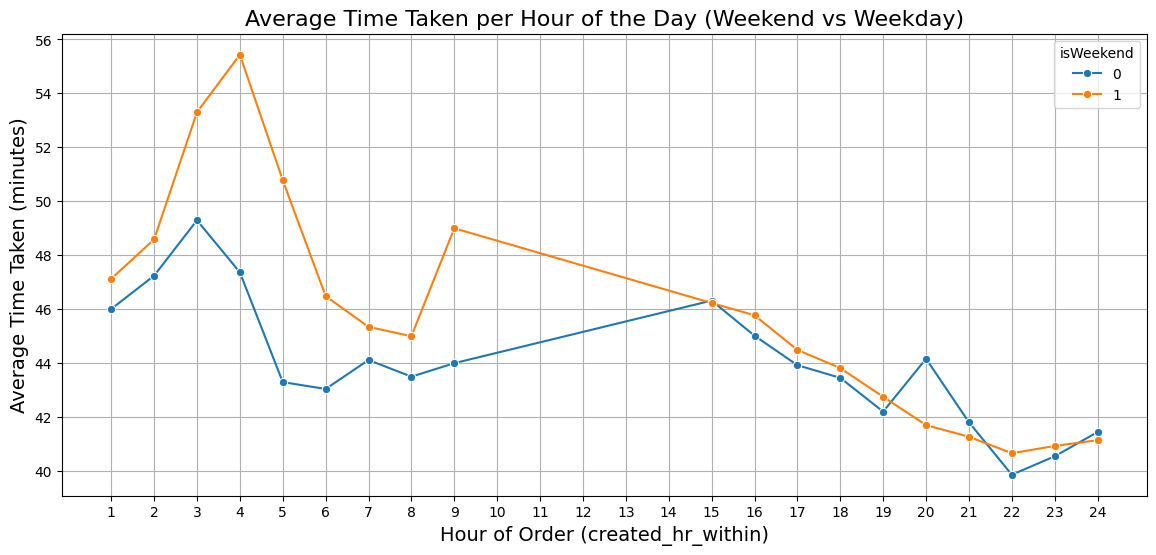

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by both created_hr_within and isWeekend
avg_time_per_hour = df_del_time.groupby(['created_hr_within', 'isWeekend'])['time_taken_minutes'].mean().reset_index()

# Sort by hour (optional, just for better x-axis)
avg_time_per_hour = avg_time_per_hour.sort_values('created_hr_within')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(x='created_hr_within', y='time_taken_minutes', hue='isWeekend', data=avg_time_per_hour, marker='o')
plt.title('Average Time Taken per Hour of the Day (Weekend vs Weekday)', fontsize=16)
plt.xlabel('Hour of Order (created_hr_within)', fontsize=14)
plt.ylabel('Average Time Taken (minutes)', fontsize=14)
plt.xticks(range(1, 25))  # 1 to 24
plt.grid(True)
plt.show()



In [22]:
df_del_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   market_id                 175777 non-null  int32
 1   store_primary_category    175777 non-null  int64
 2   order_protocol            175777 non-null  int32
 3   total_items               175777 non-null  int64
 4   subtotal                  175777 non-null  int64
 5   num_distinct_items        175777 non-null  int64
 6   min_item_price            175777 non-null  int64
 7   max_item_price            175777 non-null  int64
 8   total_onshift_dashers     175777 non-null  int64
 9   total_busy_dashers        175777 non-null  int64
 10  total_outstanding_orders  175777 non-null  int64
 11  time_taken_minutes        175777 non-null  int32
 12  day_of_week               175777 non-null  int64
 13  isWeekend                 175777 non-null  int64
 14  created_hr_within   

##### Pairplot

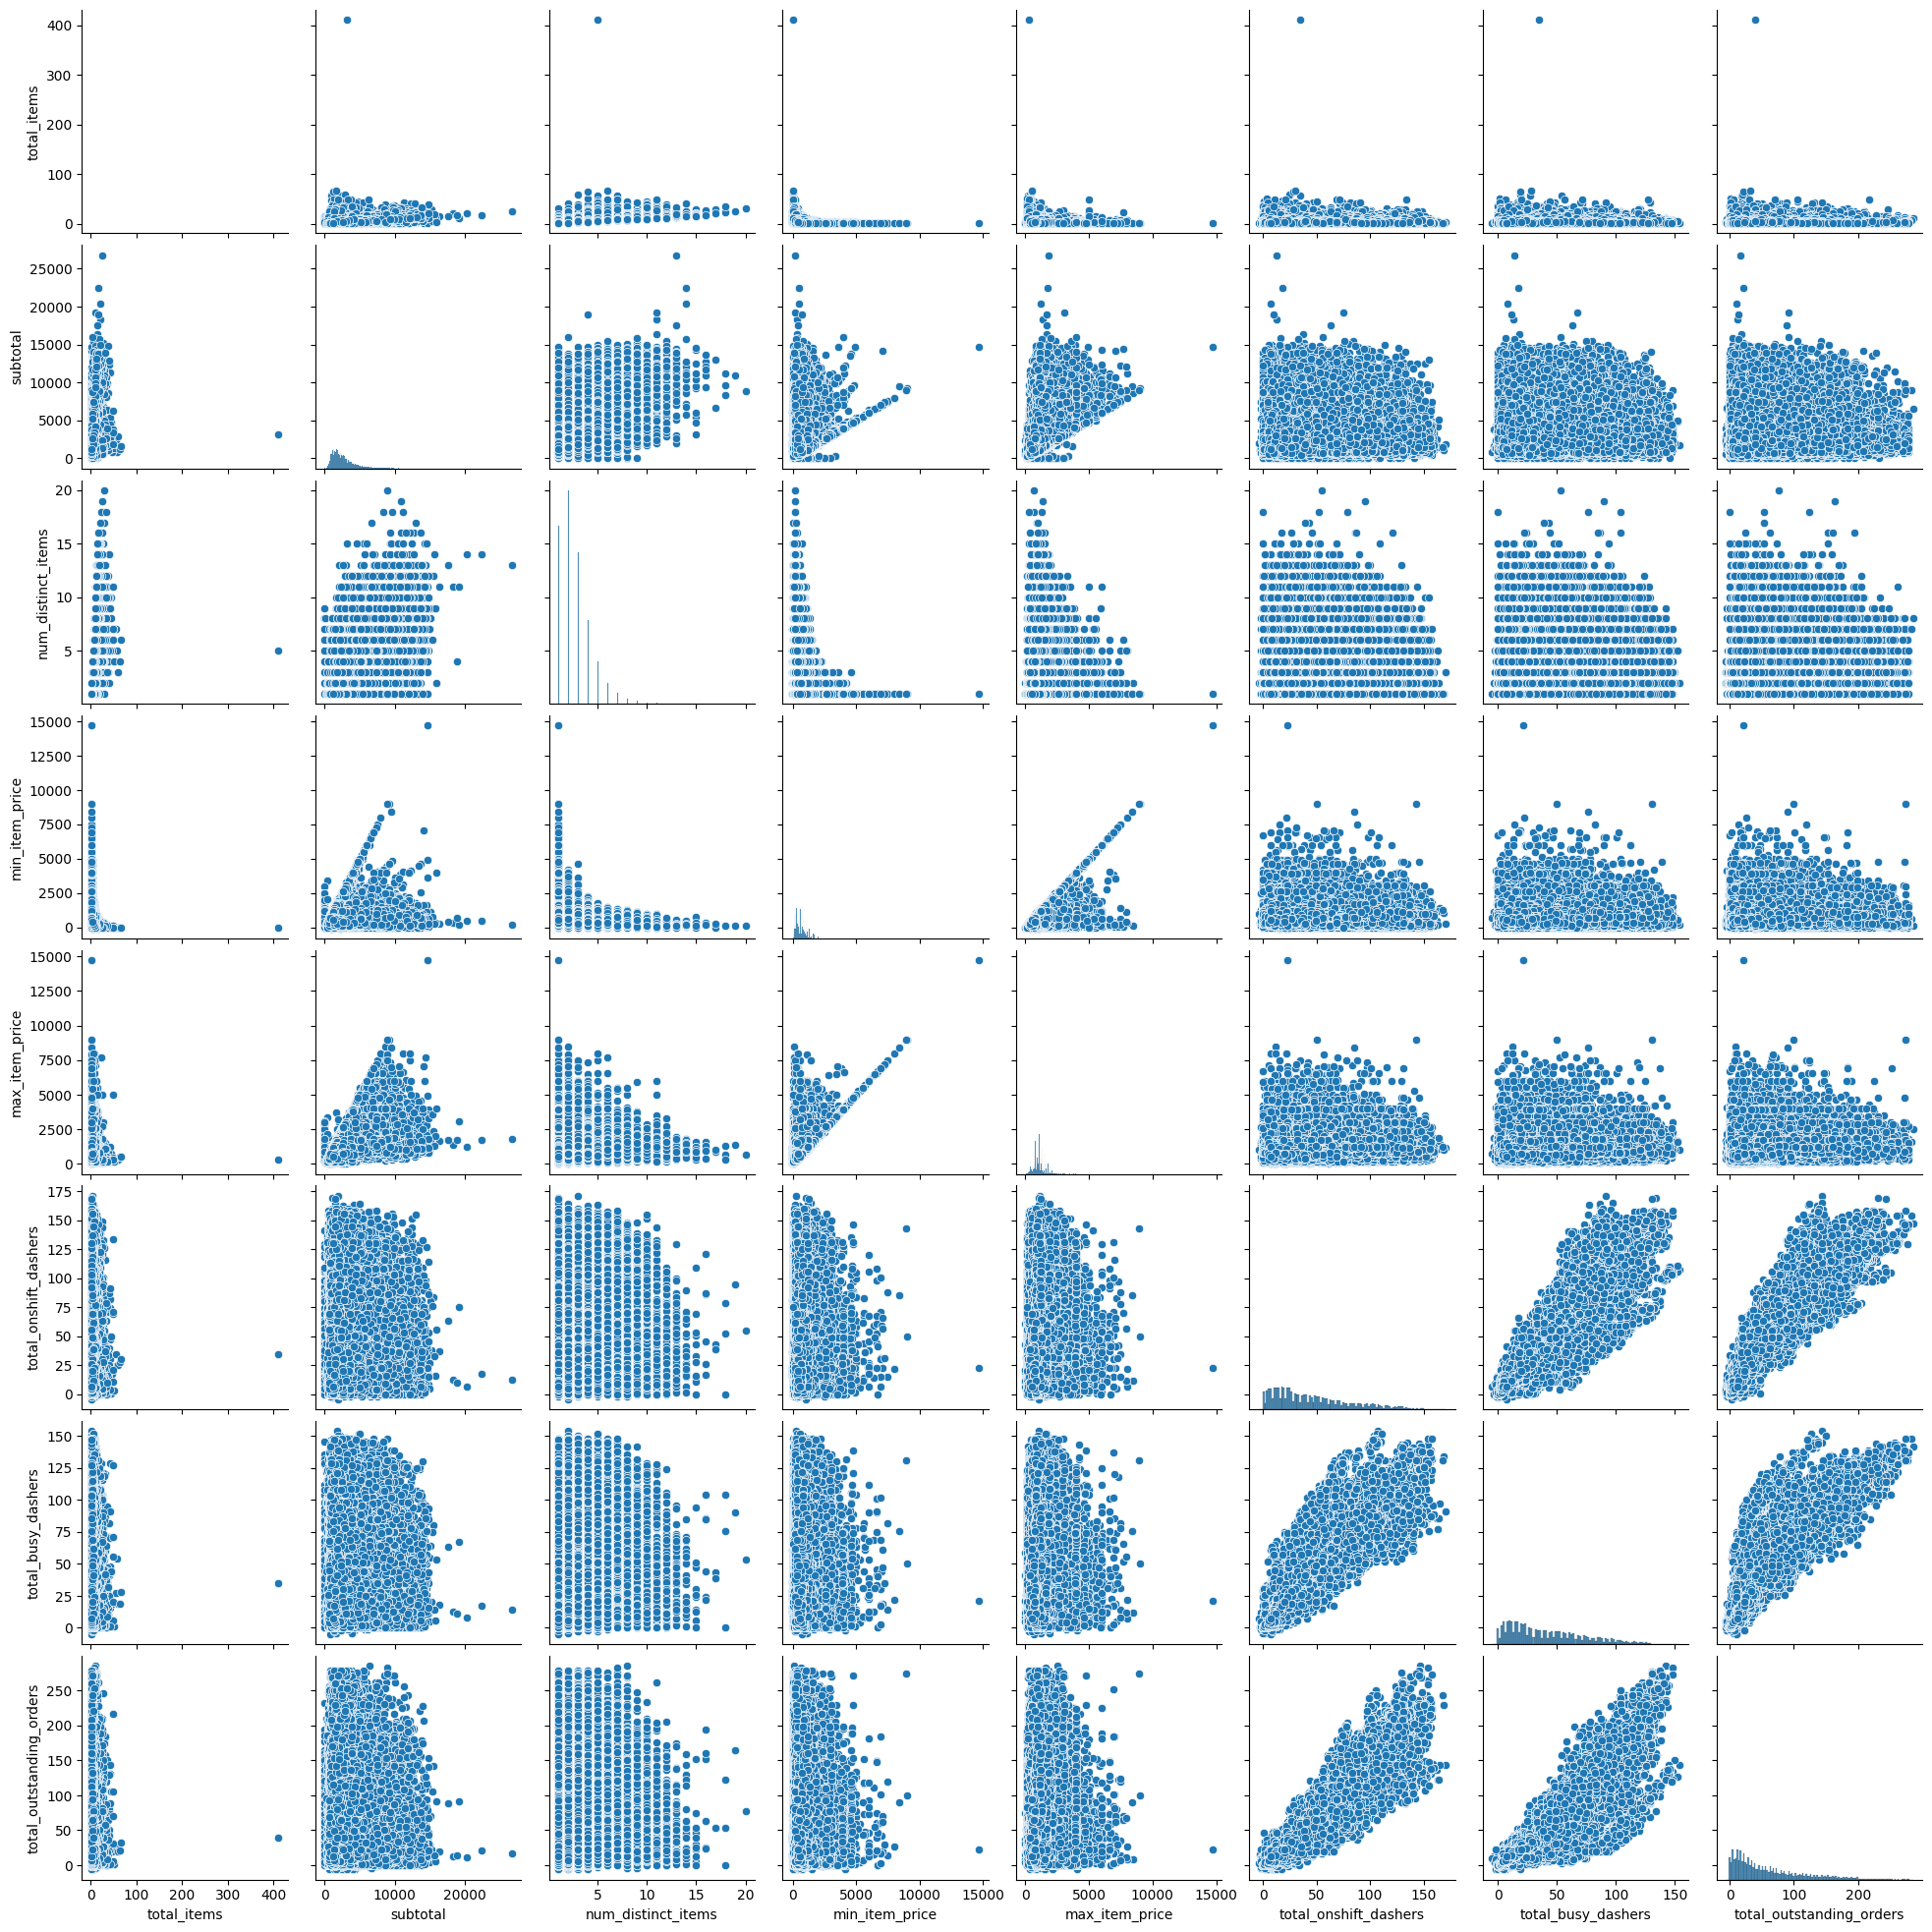

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns

df_del_time_pair_plot = df_del_time[['total_items','subtotal','num_distinct_items','min_item_price','max_item_price','total_onshift_dashers',
                                    'total_busy_dashers','total_outstanding_orders']]
sns.pairplot(df_del_time_pair_plot)
plt.show()

##### Categorical Data Visualization

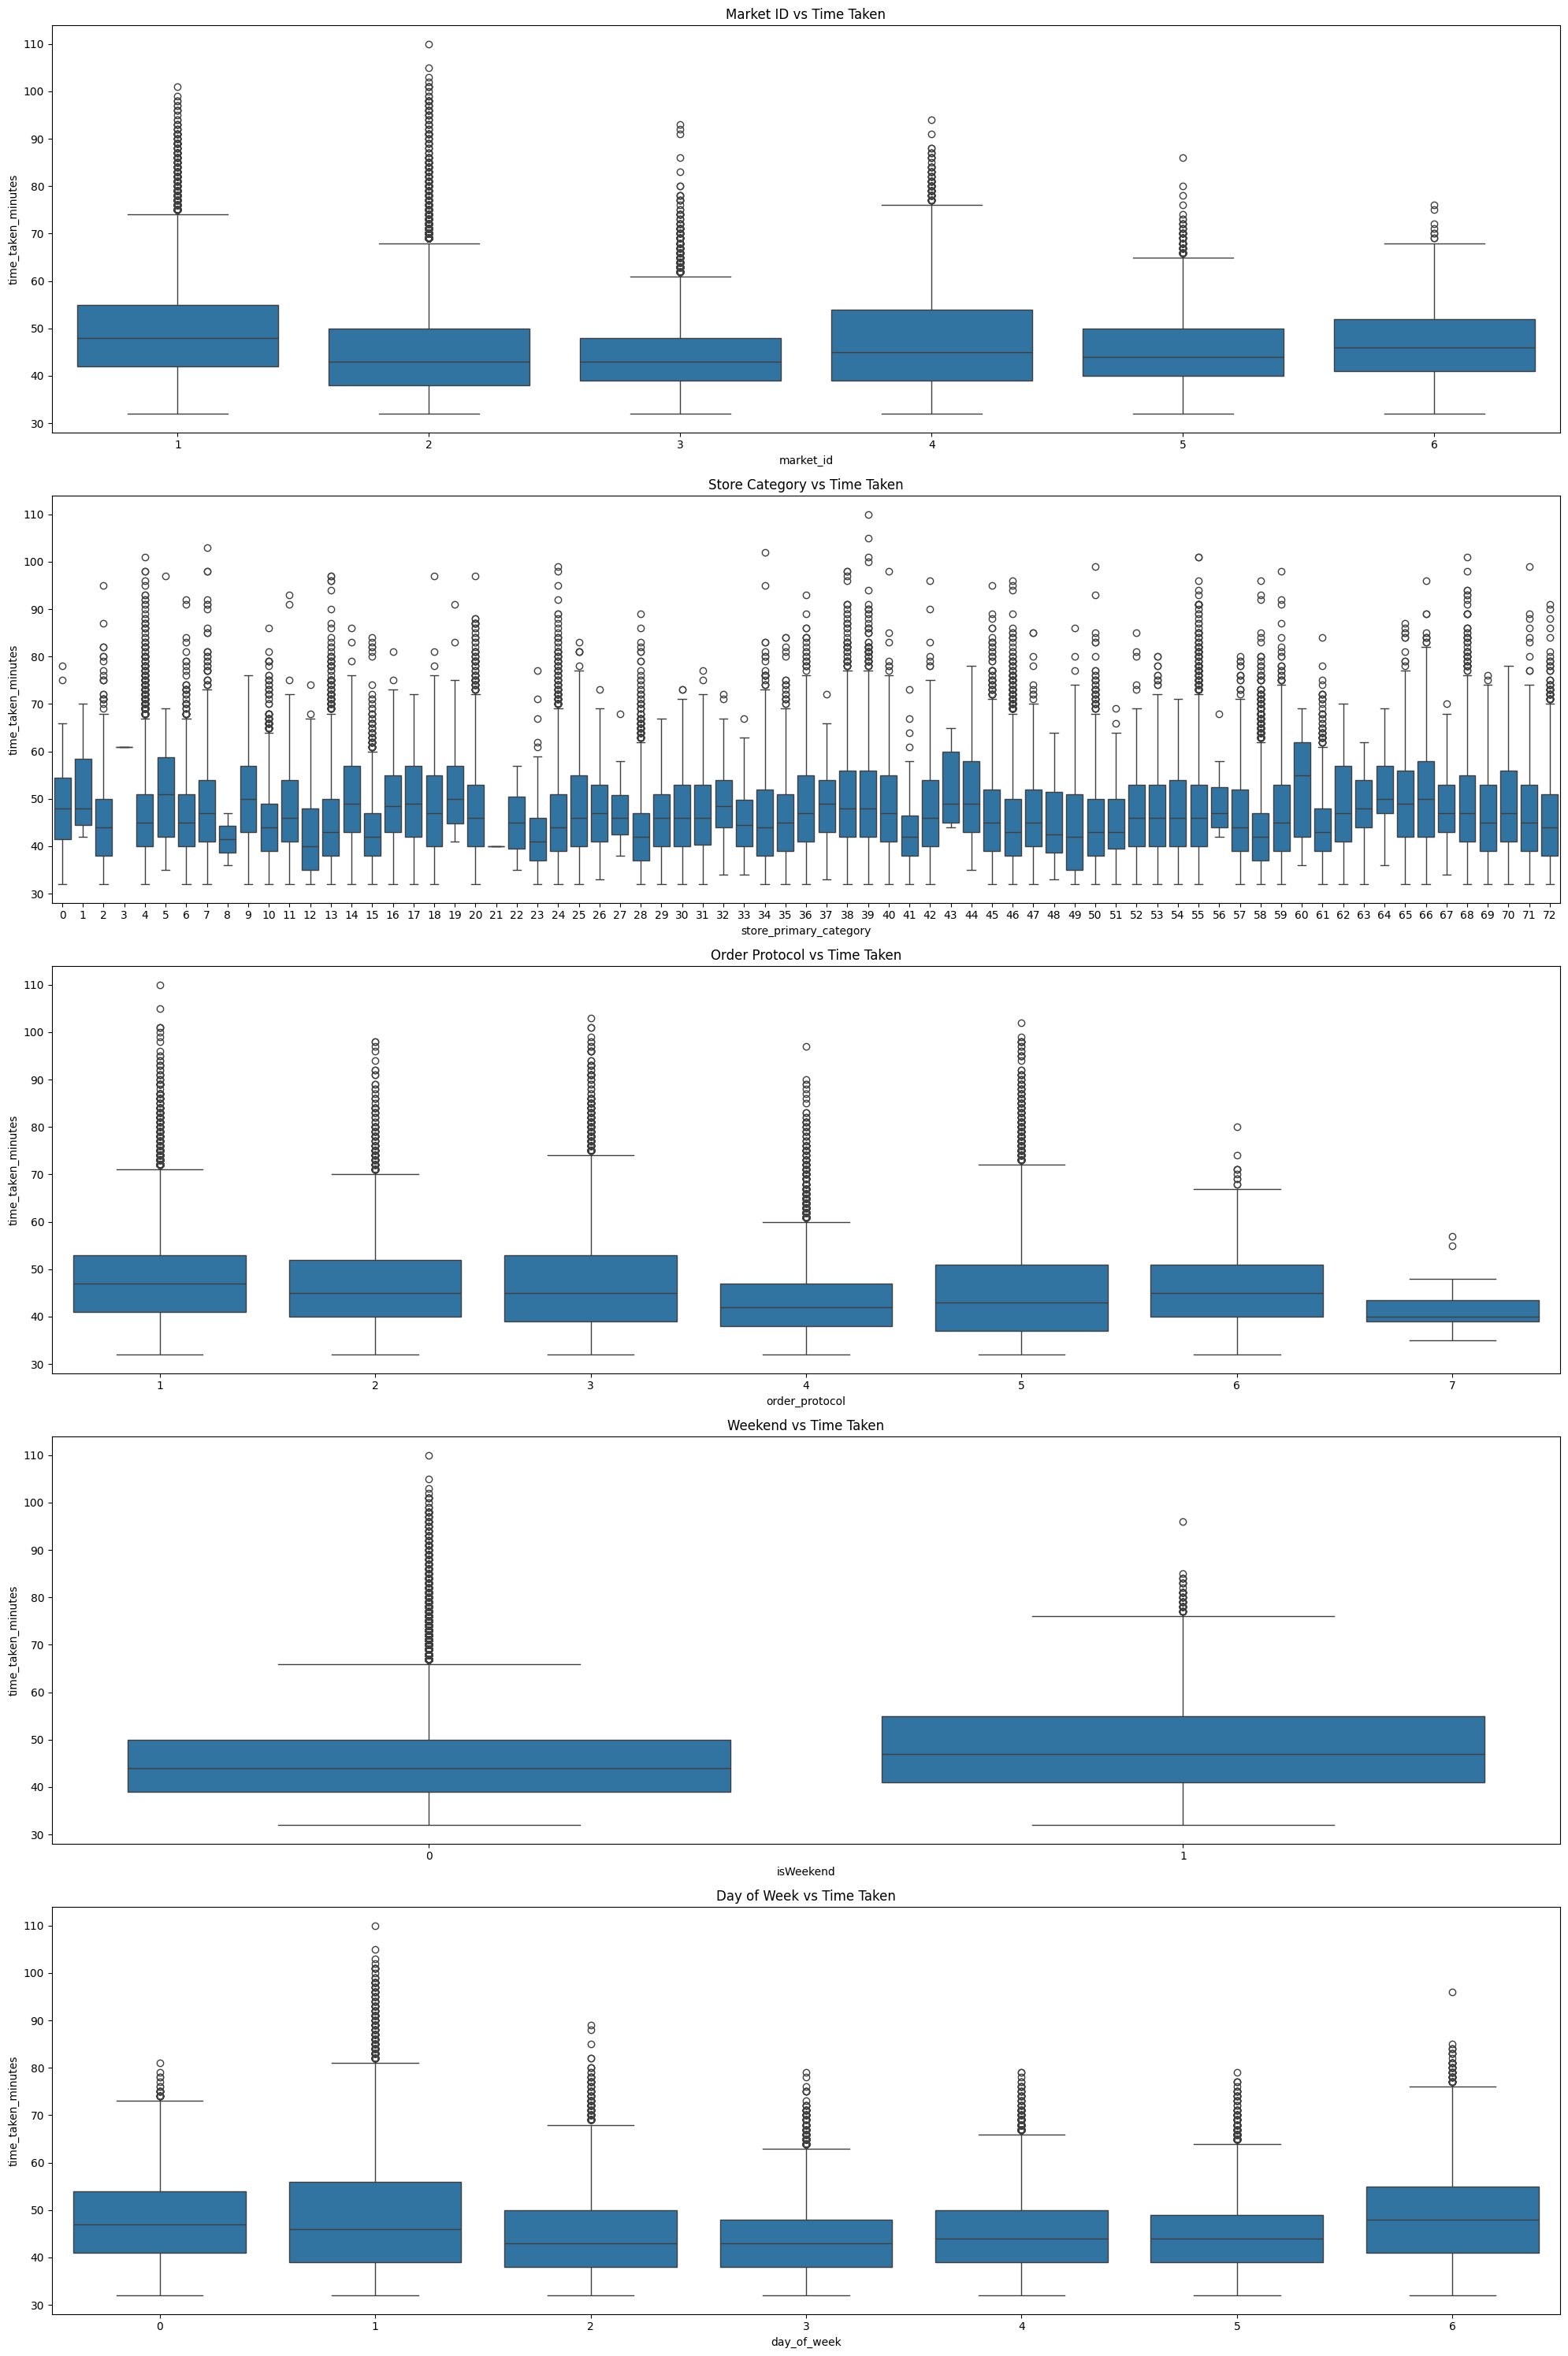

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 30))  # Make it taller for 5 plots

# Boxplot 1
plt.subplot(5, 1, 1)
sns.boxplot(x='market_id', y='time_taken_minutes', data=df_del_time)
plt.title('Market ID vs Time Taken')

# Boxplot 2
plt.subplot(5, 1, 2)
sns.boxplot(x='store_primary_category', y='time_taken_minutes', data=df_del_time)
plt.title('Store Category vs Time Taken')

# Boxplot 3
plt.subplot(5, 1, 3)
sns.boxplot(x='order_protocol', y='time_taken_minutes', data=df_del_time)
plt.title('Order Protocol vs Time Taken')

# Boxplot 4
plt.subplot(5, 1, 4)
sns.boxplot(x='isWeekend', y='time_taken_minutes', data=df_del_time)
plt.title('Weekend vs Time Taken')

# Boxplot 5
plt.subplot(5, 1, 5)
sns.boxplot(x='day_of_week', y='time_taken_minutes', data=df_del_time)
plt.title('Day of Week vs Time Taken')

plt.tight_layout()
plt.show()


#### One Hot Encoding for Category values
print( df_del_time["market_id"].nunique() )
print( df_del_time["order_protocol"].nunique() )
print( df_del_time["store_primary_category"].nunique())
print( df_del_time["total_items"].nunique())
print( df_del_time["num_distinct_items"].nunique())
df_del_time.shape

In [25]:
import pandas as pd

# Columns to one-hot encode
#cat_cols = ['market_id', 'order_protocol', 'store_primary_category', 'day_of_week', 'isWeekend', 'total_items', 'num_distinct_items']
cat_cols = ["market_id", "order_protocol", "day_of_week", "isWeekend"]

# Perform one-hot encoding
df_del_time_encoded = pd.get_dummies(df_del_time, columns=cat_cols, drop_first=True)

# Convert all boolean columns to integers (if any remain)
df_del_time_encoded = df_del_time_encoded.astype(int)


In [26]:
df_del_time_encoded.head()

store_primary_category  total_items  subtotal  num_distinct_items  \
0                       4            4      3441                   4   
1                      46            1      1900                   1   
2                      36            4      4771                   3   
3                      38            1      1525                   1   
4                      38            2      3620                   2   

   min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  \
0             557            1239                     33                  14   
1            1400            1400                      1                   2   
2             820            1604                      8                   6   
3            1525            1525                      5                   6   
4            1425            2195                      5                   5   

   total_outstanding_orders  time_taken_minutes  ...  order_protocol_5  \
0                        21                  47  ...                 0   
1                         2                  44  ...                 0   
2                        18                  55  ...                 0   
3                         8                  59  ...                 0   
4                         7                  46  ...                 0   

   order_protocol_6  order_protocol_7  day_of_week_1  day_of_week_2  \
0                 0                 0              0              0   
1                 0                 0              0              1   
2                 0                 0              1              0   
3                 0                 0              0              0   
4                 0                 0              0              1   

   day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  isWeekend_1  
0              0              0              1              0            0  
1              0              0              0              0            0  
2              0              0              0              0            0  
3              0              1              0              0            0  
4              0              0              0              0            0  

[5 rows x 30 columns]

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [27]:
# Define target variable (y) and features (X)

# 1. DataFrame without 'time_taken'
X_df_del_time = df_del_time_encoded.drop(columns=['time_taken_minutes'])

# 2. DataFrame with only 'time_taken'
y_df_del_time = df_del_time_encoded[['time_taken_minutes']]

In [28]:
y_df_del_time.shape

(175777, 1)

In [29]:
X_df_del_time.shape

(175777, 29)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

#### Splitting the Data into Training and Testing Sets

In [30]:
# Checking the number of rows of data file
df_del_time_encoded.shape

(175777, 30)

In [31]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
X_train, X_test, y_train, y_test, = train_test_split(X_df_del_time, y_df_del_time, test_size= 0.2, random_state = 100)
#X_train, X_test = train_test_split(X_df_del_time, test_size= 0.2, random_state = 100)

X_train_unscaled = X_train.copy()  # keeting an unscaled copy
y_train_unscaled = X_train.copy()  # keeting an unscaled copy

In [32]:
# Checking the number of rows of training data file
X_train.shape

(140621, 29)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [33]:
#df_train.describe()
X_train.head(5)

store_primary_category  total_items  subtotal  num_distinct_items  \
42111                        7            1      1350                   1   
58452                       46            5      4285                   5   
20644                       45            6      7880                   3   
79735                       45            3      3660                   3   
167933                       4            5      8575                   5   

        min_item_price  max_item_price  total_onshift_dashers  \
42111             1350            1350                     23   
58452              495             900                    112   
20644             1195            1450                     80   
79735              975            1450                    127   
167933            1200            2625                     44   

        total_busy_dashers  total_outstanding_orders  created_hr_within  ...  \
42111                   20                        19                 21  ...   
58452                  100                       207                  3  ...   
20644                   79                       115                  4  ...   
79735                  106                       173                  3  ...   
167933                  44                        61                  3  ...   

        order_protocol_5  order_protocol_6  order_protocol_7  day_of_week_1  \
42111                  0                 0                 0              1   
58452                  1                 0                 0              0   
20644                  0                 0                 0              0   
79735                  0                 0                 0              0   
167933                 1                 0                 0              0   

        day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
42111               0              0              0              0   
58452               0              0              0              0   
20644               0              0              0              1   
79735               0              0              0              0   
167933              0              0              1              0   

        day_of_week_6  isWeekend_1  
42111               0            0  
58452               1            1  
20644               0            0  
79735               1            1  
167933              0            0  

[5 rows x 29 columns]

In [34]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_vars = ['subtotal', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
            'total_outstanding_orders','distance','total_items','num_distinct_items',
            'store_primary_categor','market_id','order_protocol','day_of_week']
cat_vars = [col for col in X_train.columns if col not in num_vars]
cat_vars

['store_primary_category',
 'created_hr_within',
 '100X_distance',
 'market_id_2',
 'market_id_3',
 'market_id_4',
 'market_id_5',
 'market_id_6',
 'order_protocol_2',
 'order_protocol_3',
 'order_protocol_4',
 'order_protocol_5',
 'order_protocol_6',
 'order_protocol_7',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'isWeekend_1']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for continuous numerical columns in the training set to understand their spread and any skewness

In [35]:
def plot_numeric_columns(df,comment):
    """Plots Histogram, Boxplot, and KDE Plot for all numeric columns in a given DataFrame."""
    #num_cols = df.select_dtypes(include=["number"]).columns
    num_cols = [col for col in df.select_dtypes(include=["number"]).columns if col not in exclude_cols]

    for col in num_cols:
        plt.figure(figsize=(18, 5))

        # Histogram: Data Distribution
        plt.subplot(1, 3, 1)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Histogram of {col}')

        # Boxplot: Quartile range and Outliers
        plt.subplot(1, 3, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        # KDE Plot: Probability Distribution
        plt.subplot(1, 3, 3)
        sns.kdeplot(df[col], fill=True)
        plt.title(f'Density Plot of {col}')

        plt.tight_layout()

        save_plot_to_pdf(f"{comment} For column {col}")
        plt.show()

# Catrgorical Columns to exclude from outlier removal
exclude_cols = ["market_id", "store_primary_category", "order_protocol", "day_of_week", "year", "month", "date", "weekday"]  

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column total_items
Plot saved to PDF!


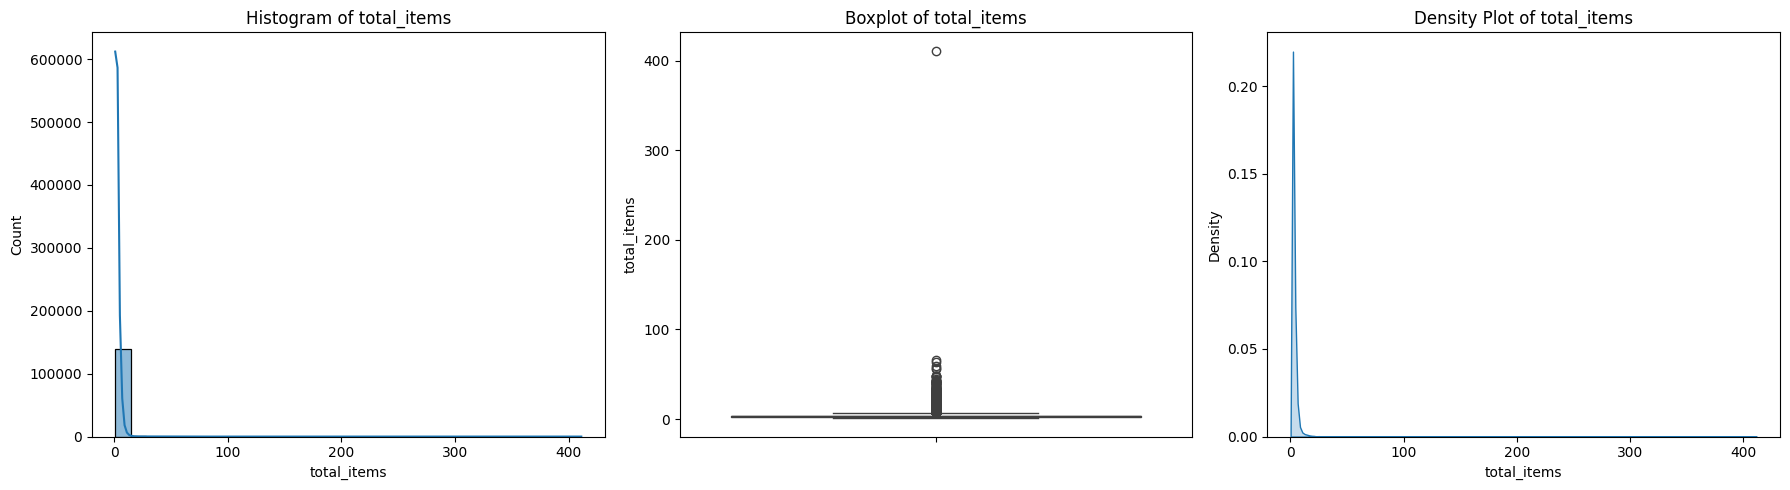

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column subtotal
Plot saved to PDF!


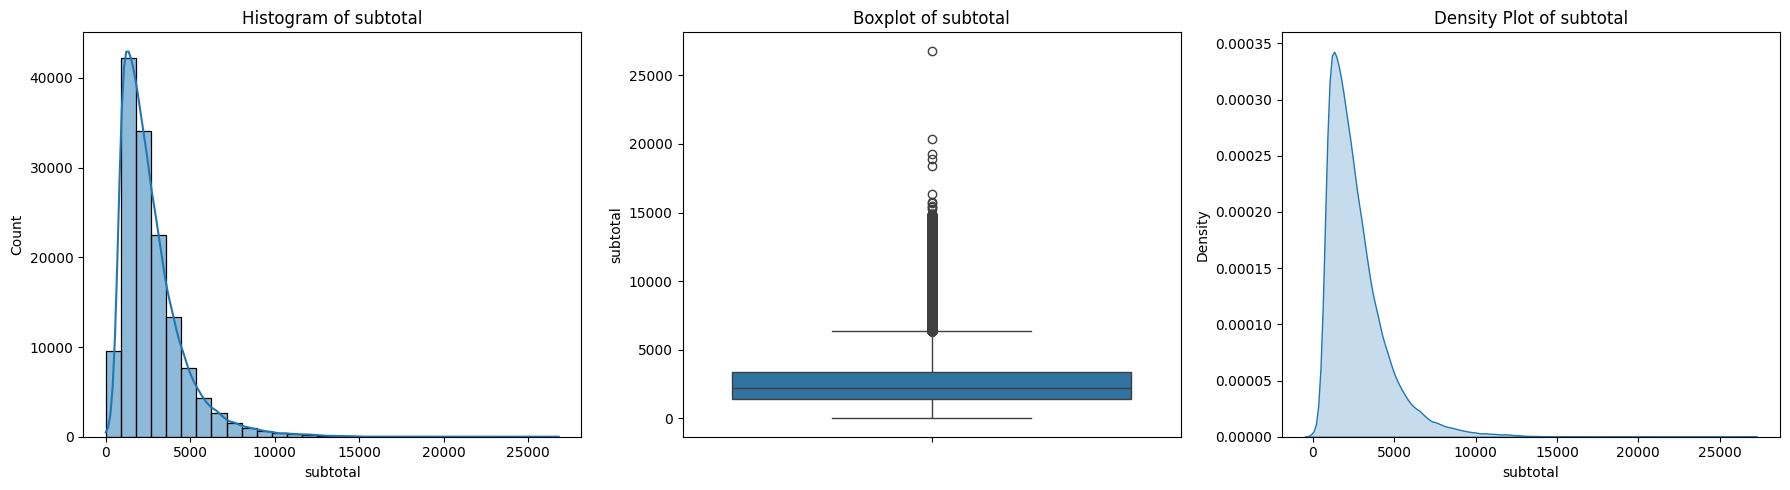

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column num_distinct_items
Plot saved to PDF!


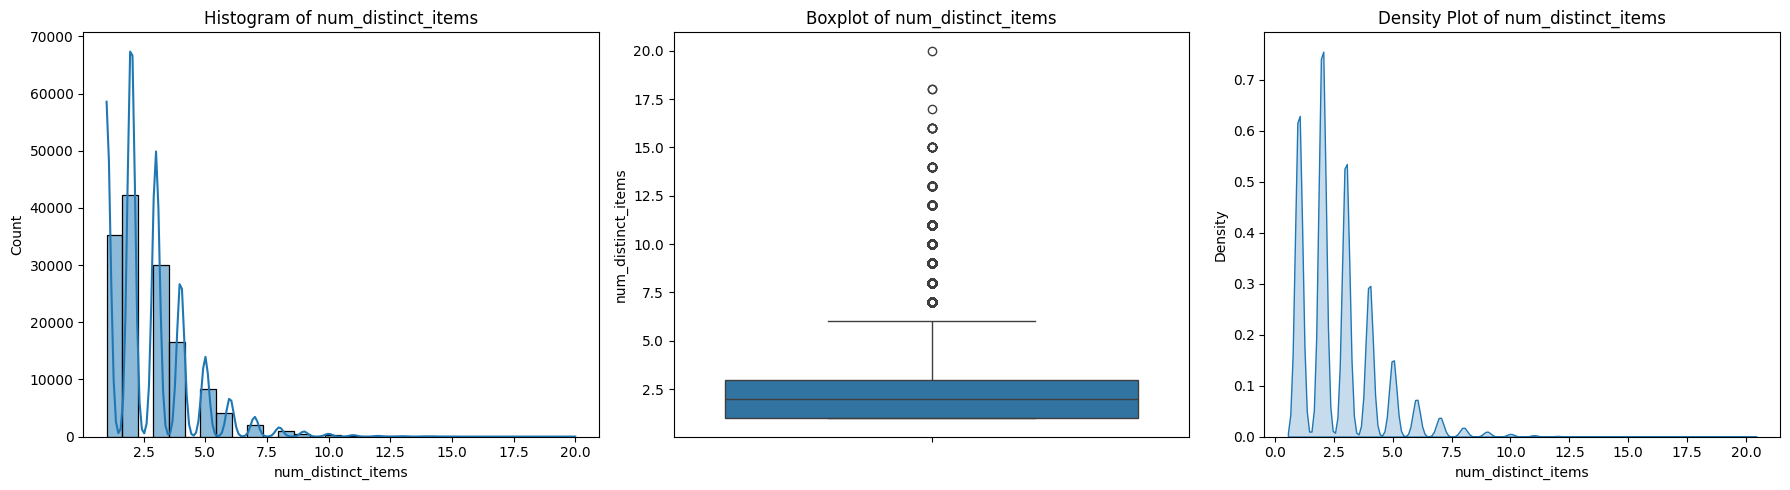

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column min_item_price
Plot saved to PDF!


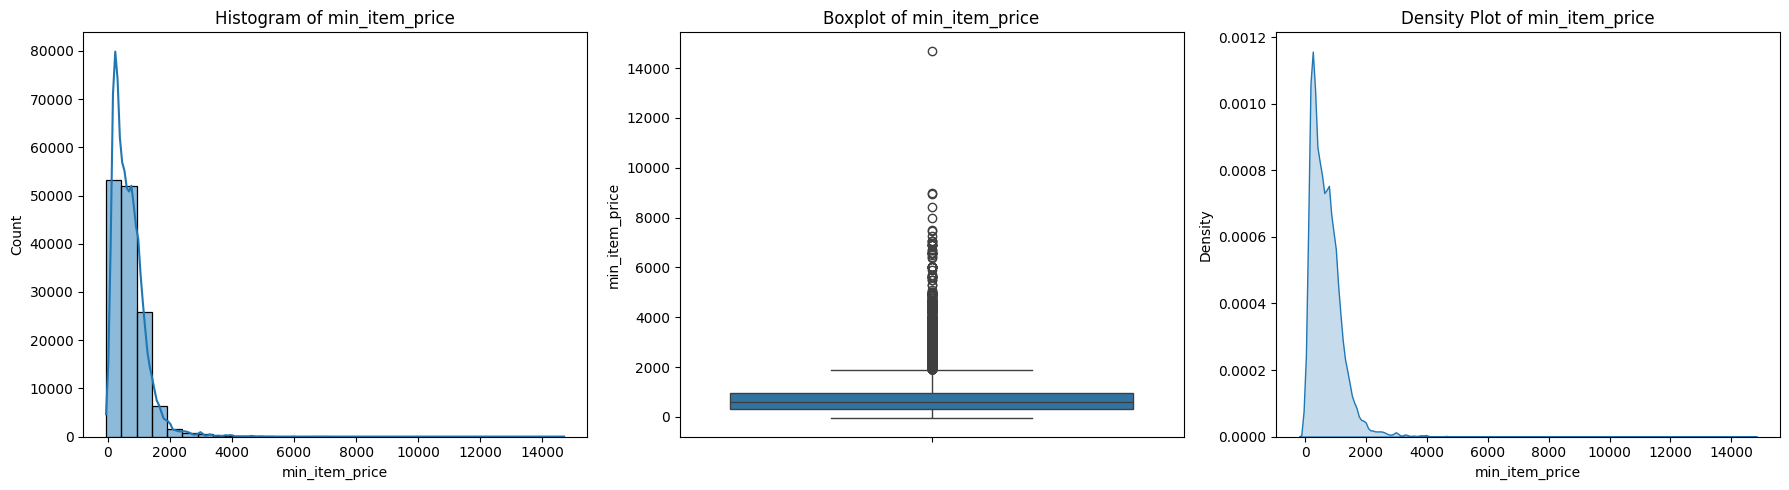

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column max_item_price
Plot saved to PDF!


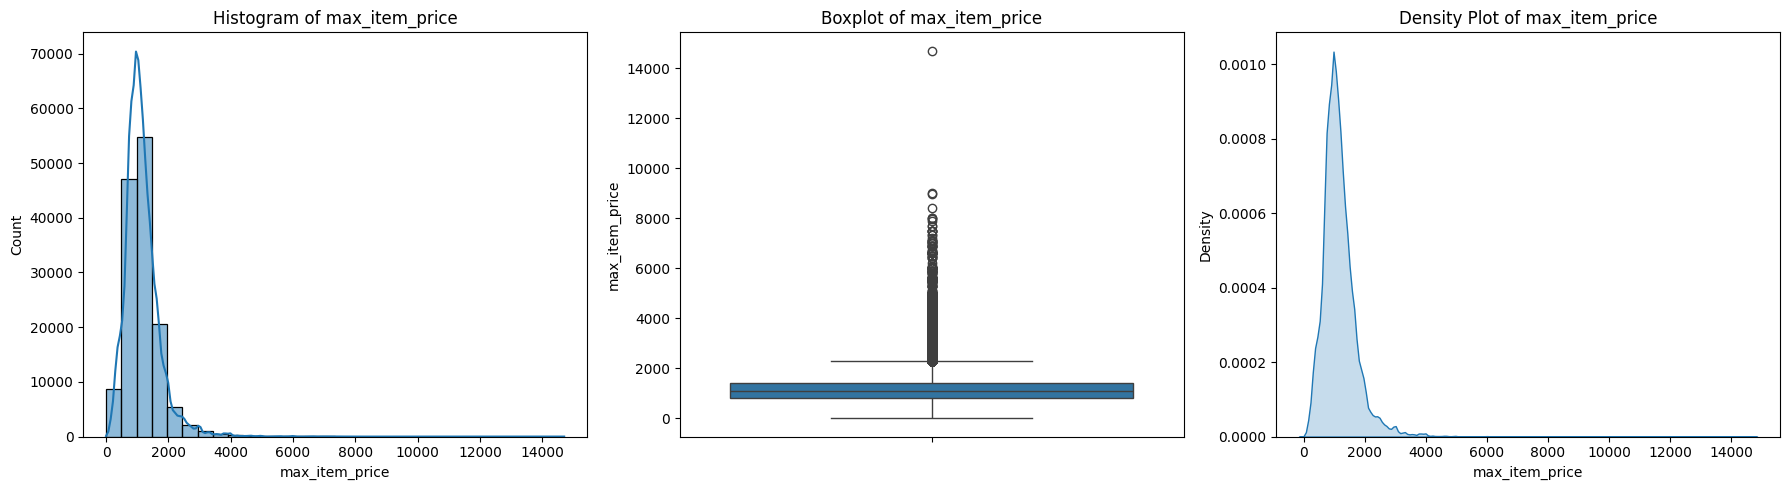

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column total_onshift_dashers
Plot saved to PDF!


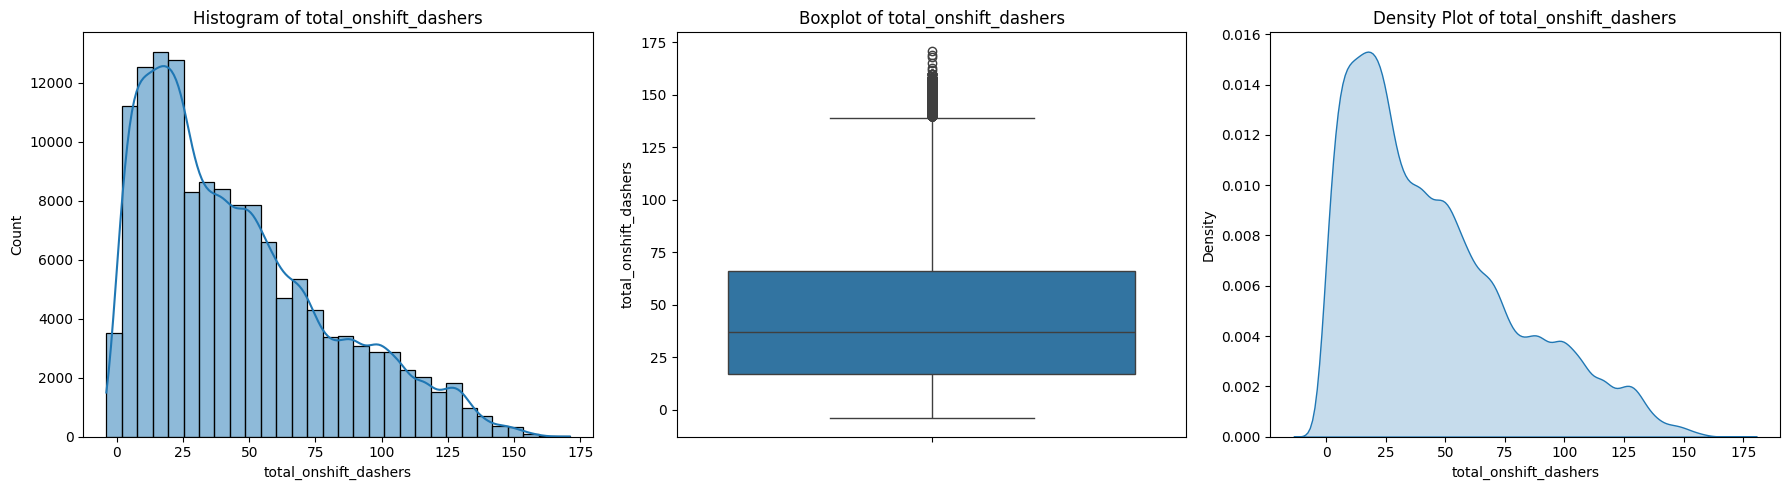

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column total_busy_dashers
Plot saved to PDF!


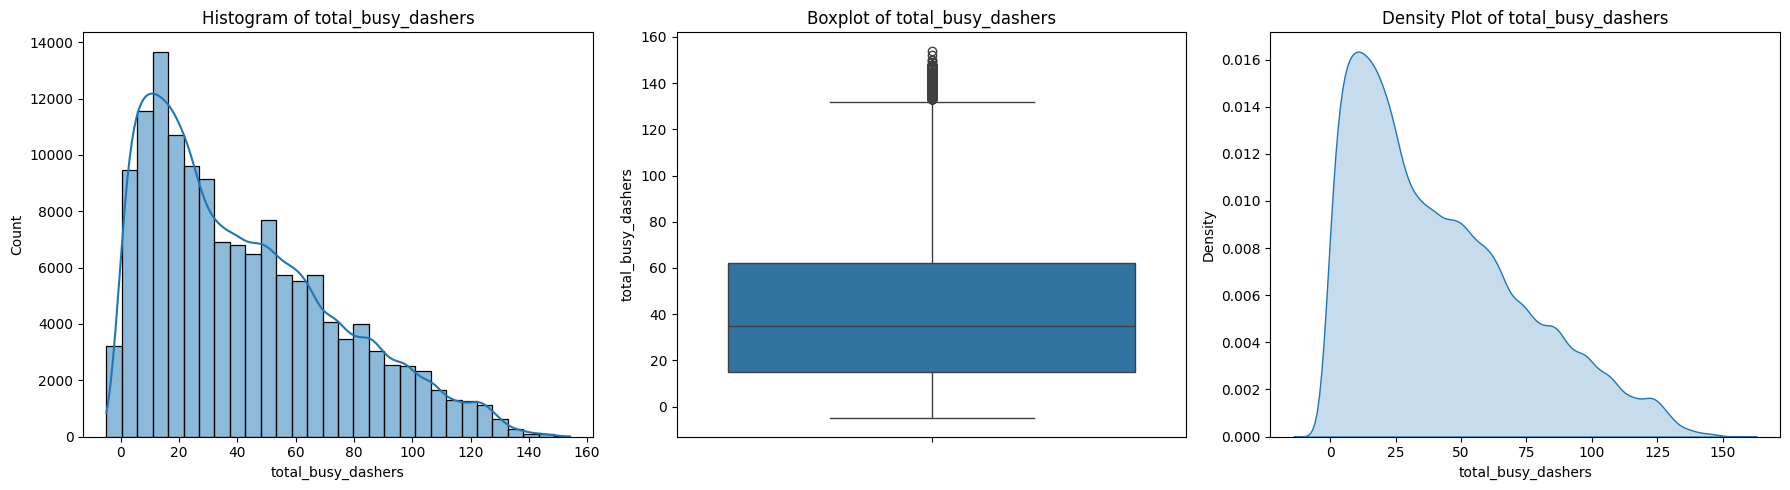

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column total_outstanding_orders
Plot saved to PDF!


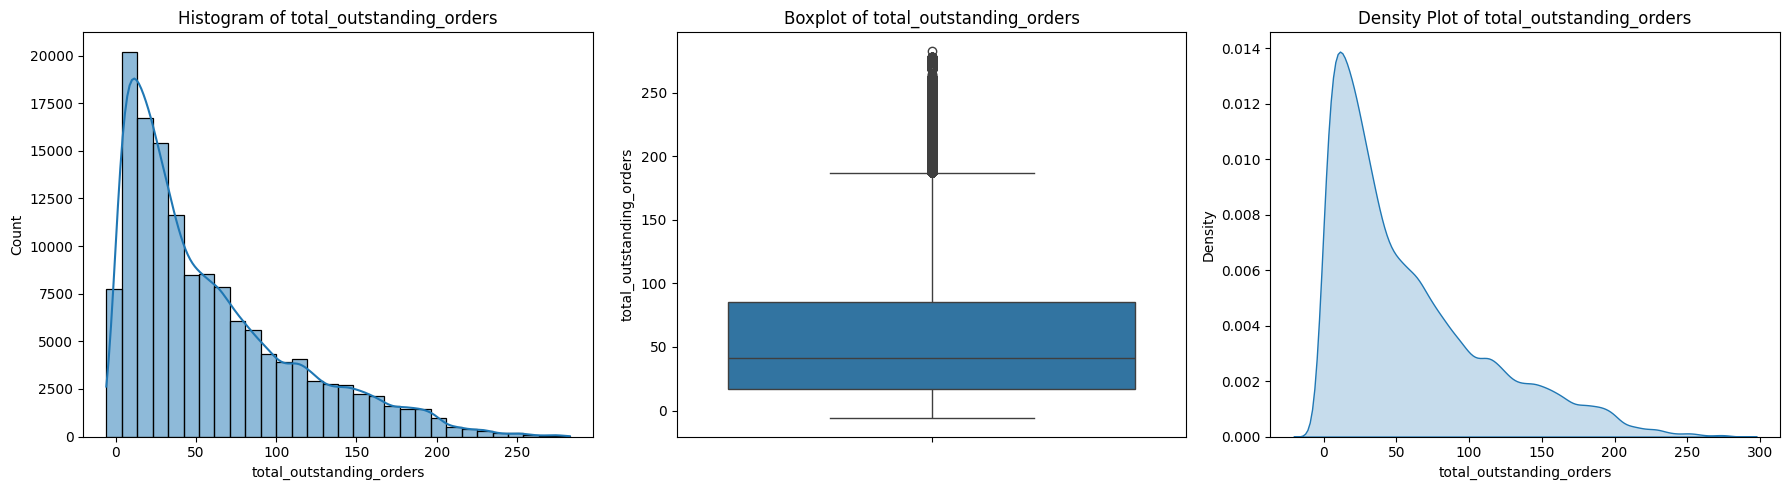

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column created_hr_within
Plot saved to PDF!


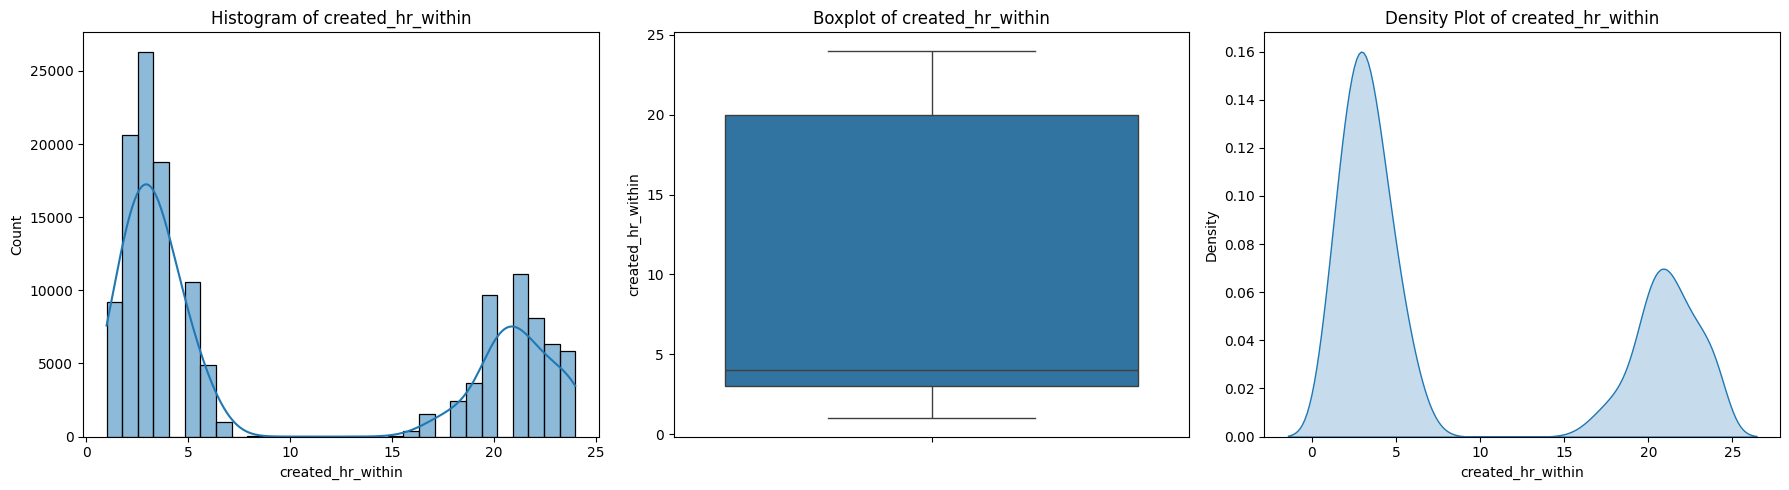

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column 100X_distance
Plot saved to PDF!


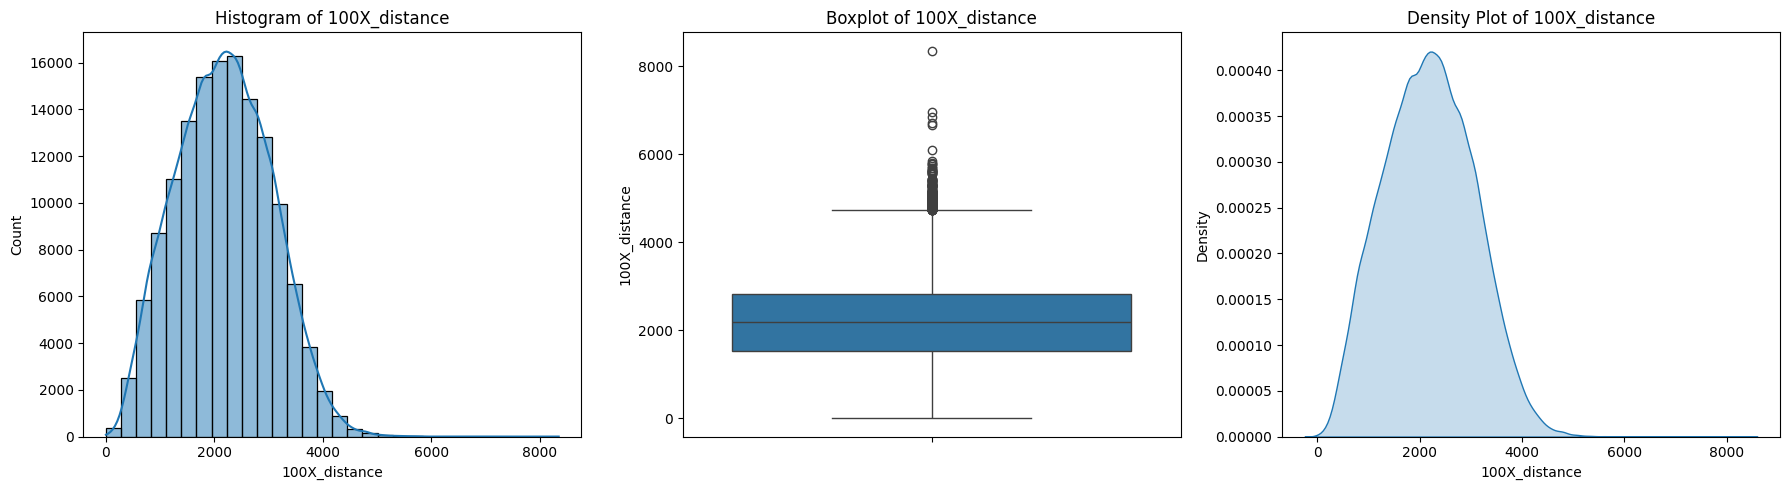

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column market_id_2
Plot saved to PDF!


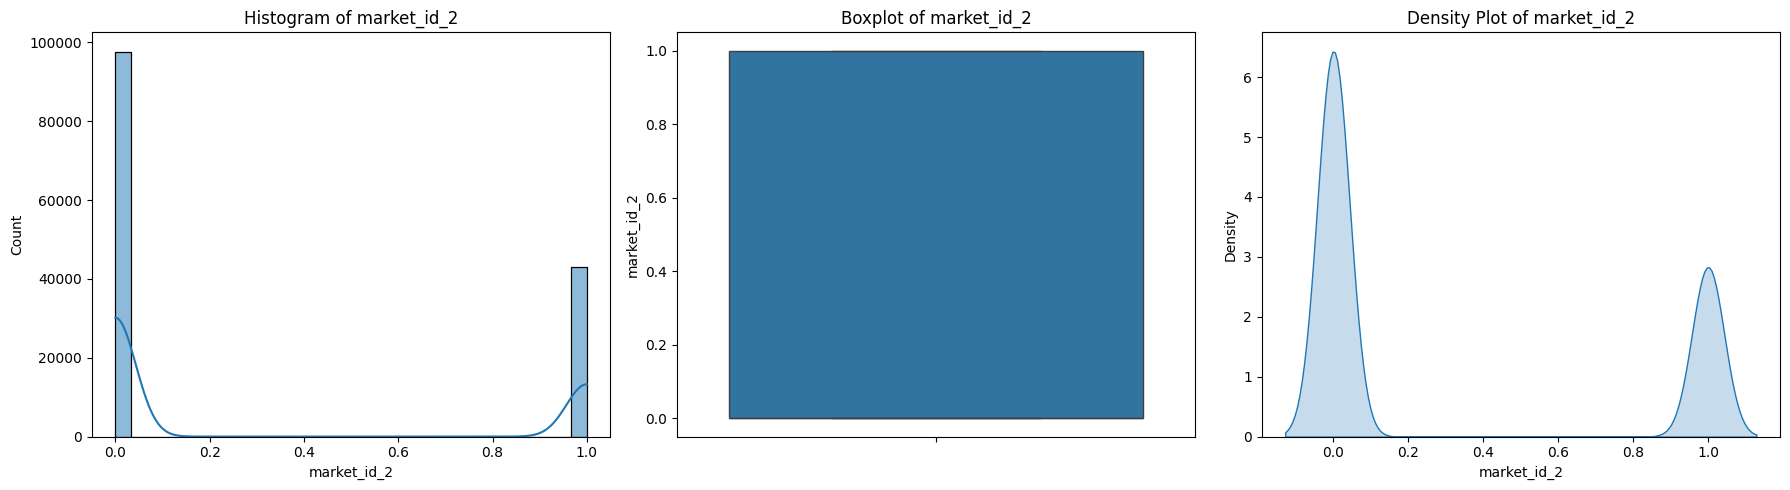

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column market_id_3
Plot saved to PDF!


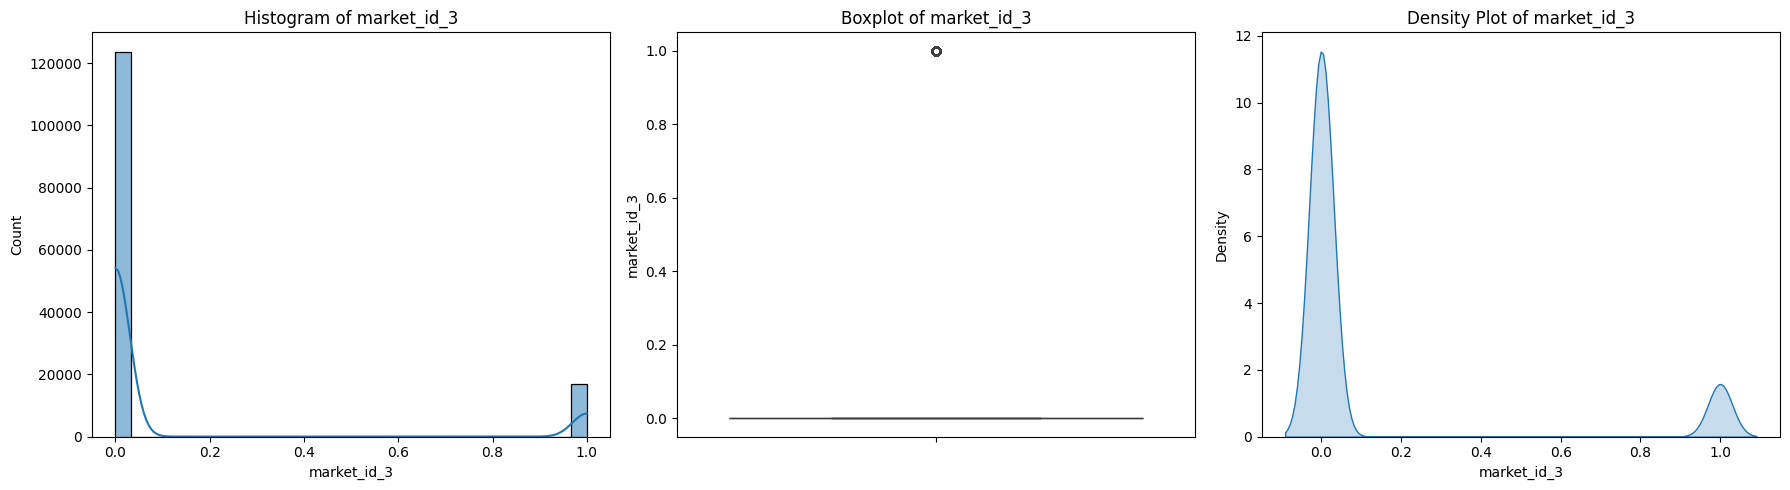

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column market_id_4
Plot saved to PDF!


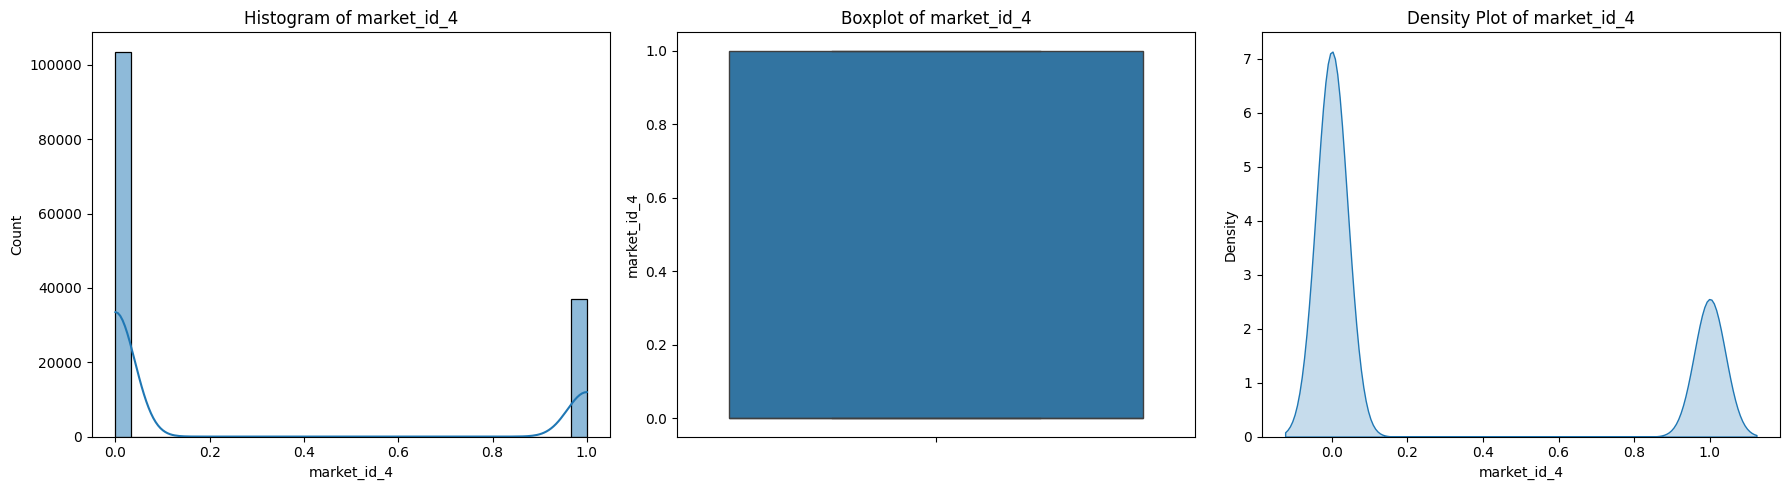

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column market_id_5
Plot saved to PDF!


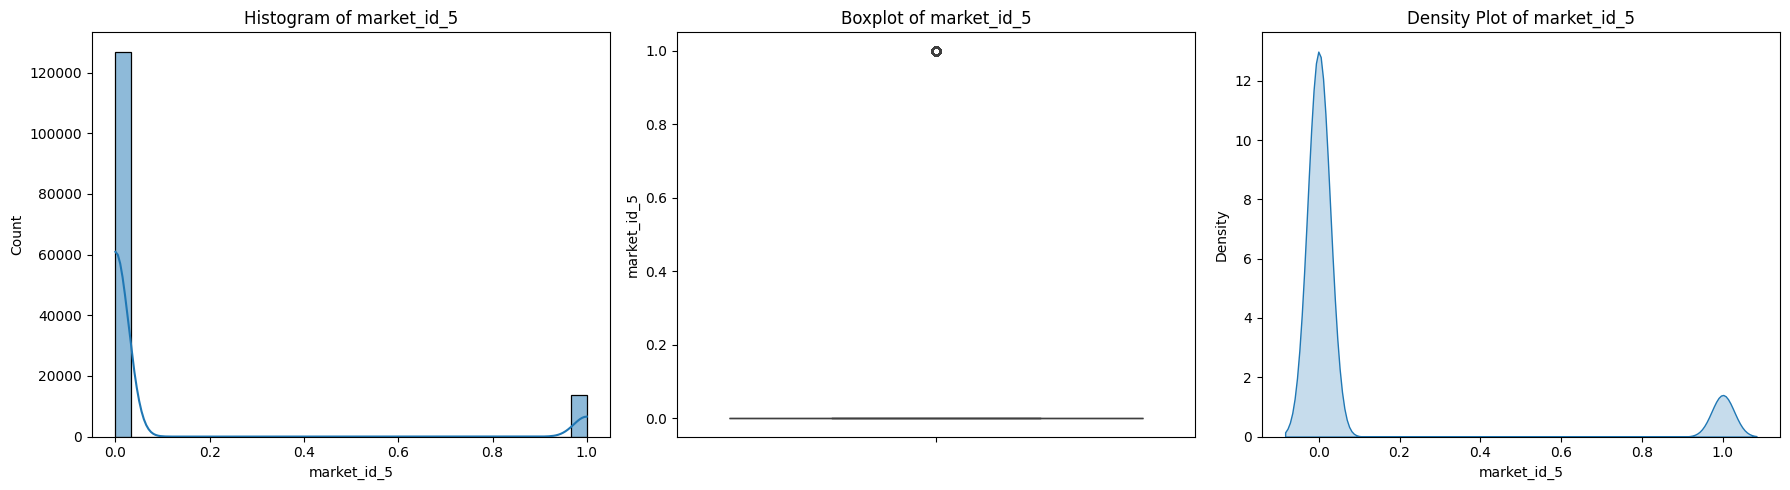

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column market_id_6
Plot saved to PDF!


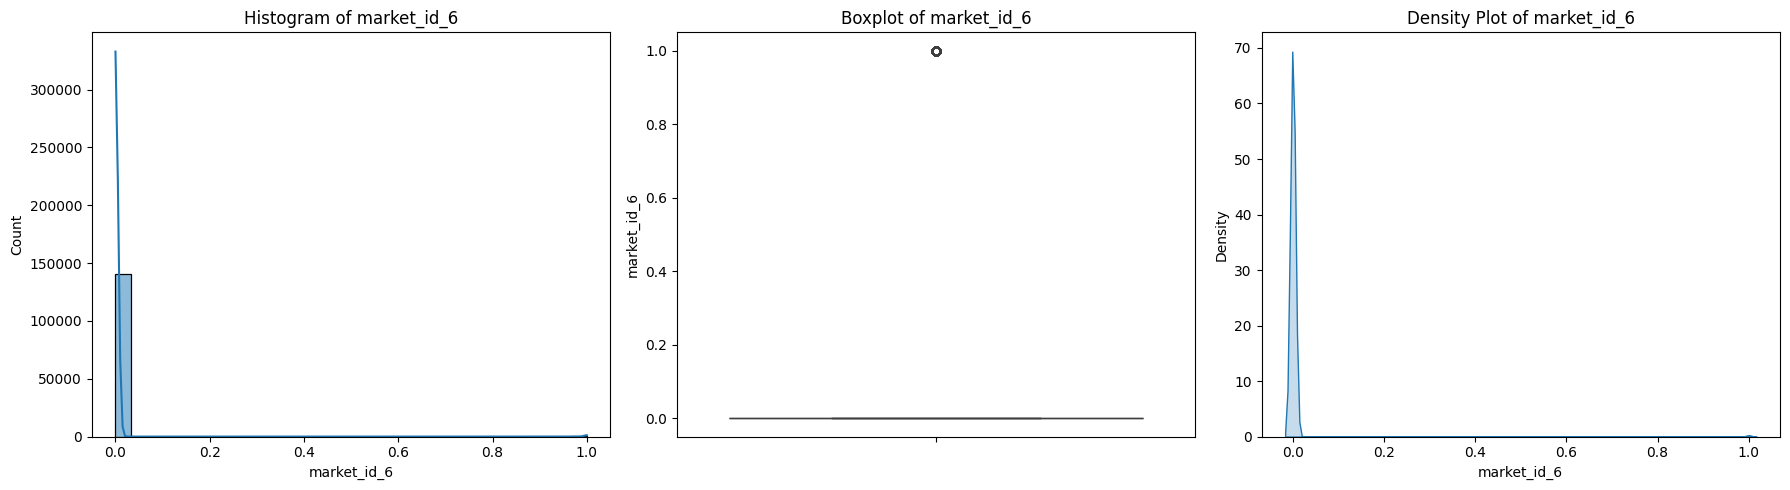

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column order_protocol_2
Plot saved to PDF!


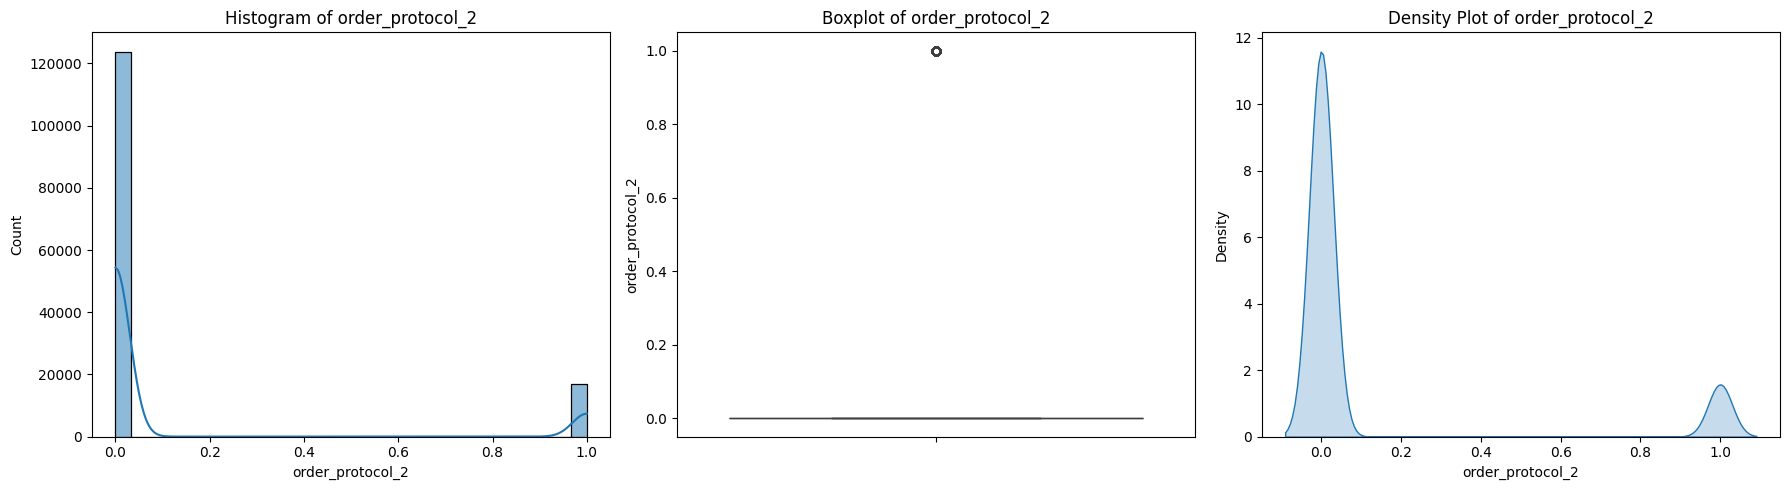

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column order_protocol_3
Plot saved to PDF!


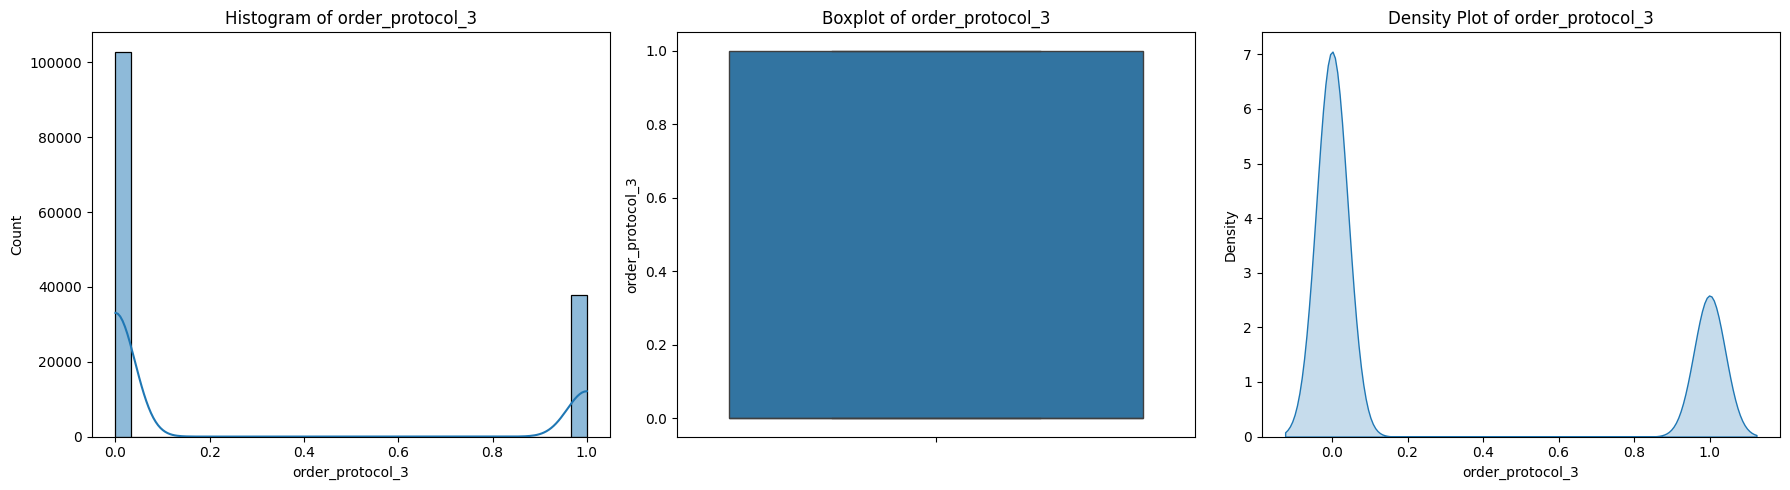

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column order_protocol_4
Plot saved to PDF!


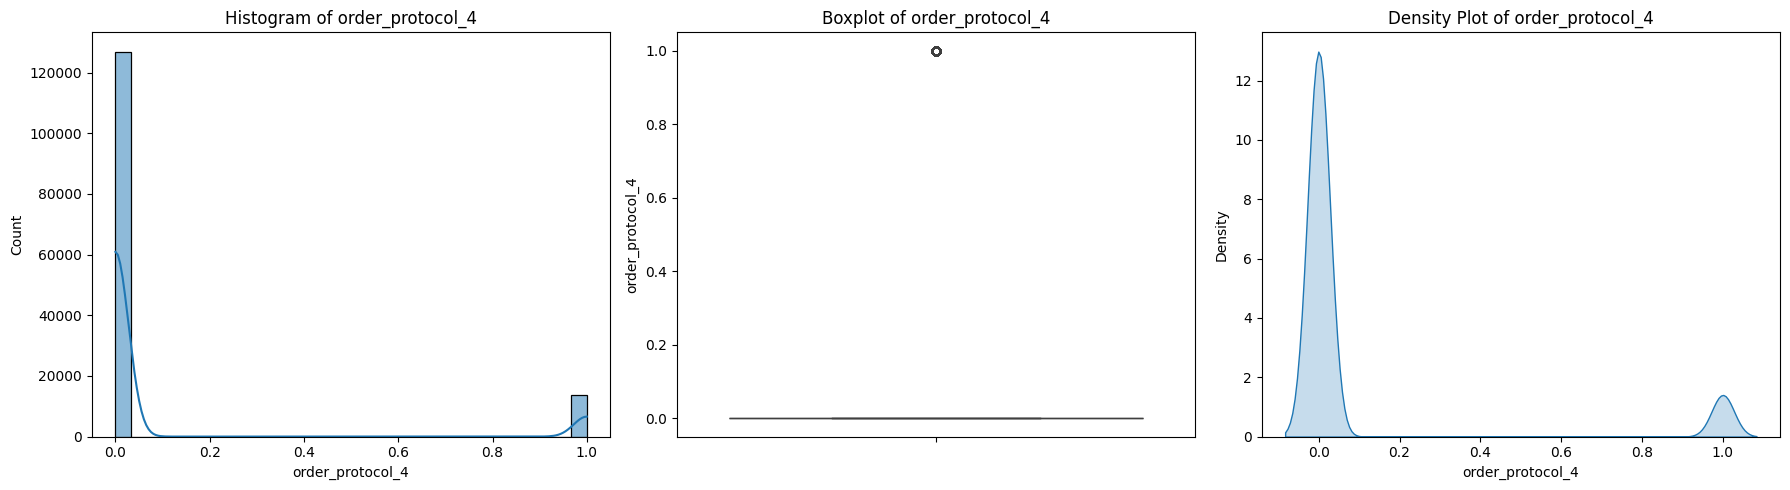

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column order_protocol_5
Plot saved to PDF!


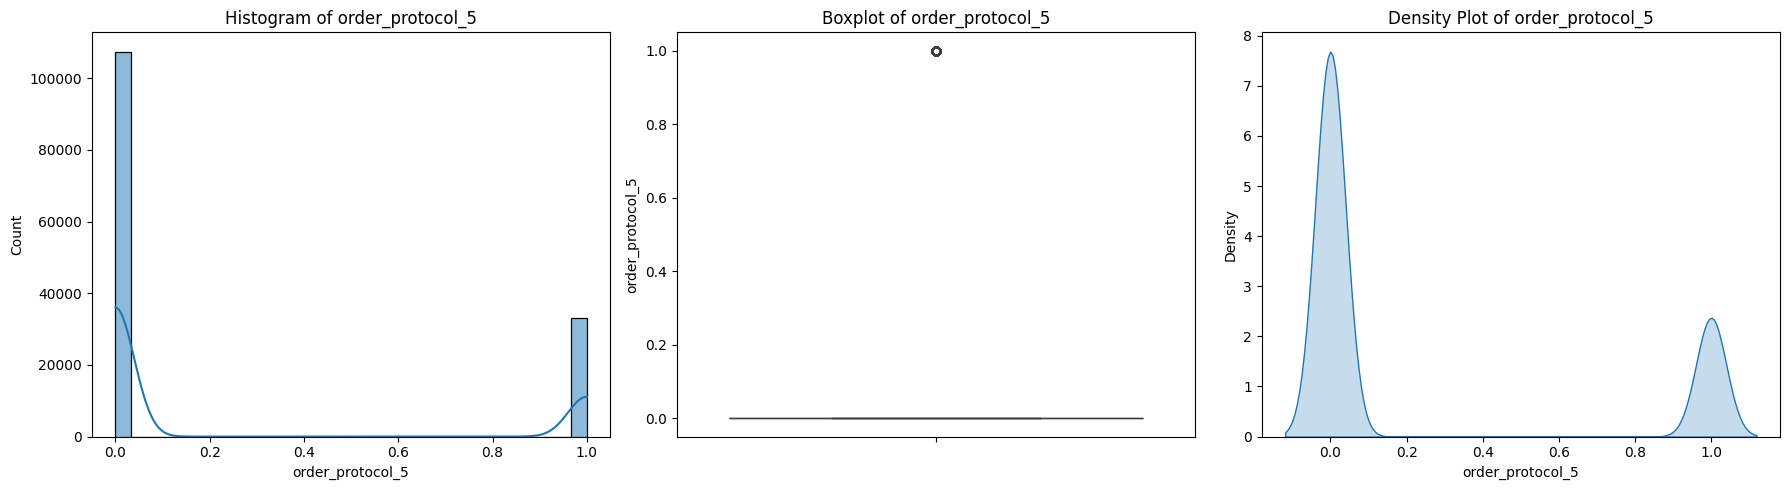

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column order_protocol_6
Plot saved to PDF!


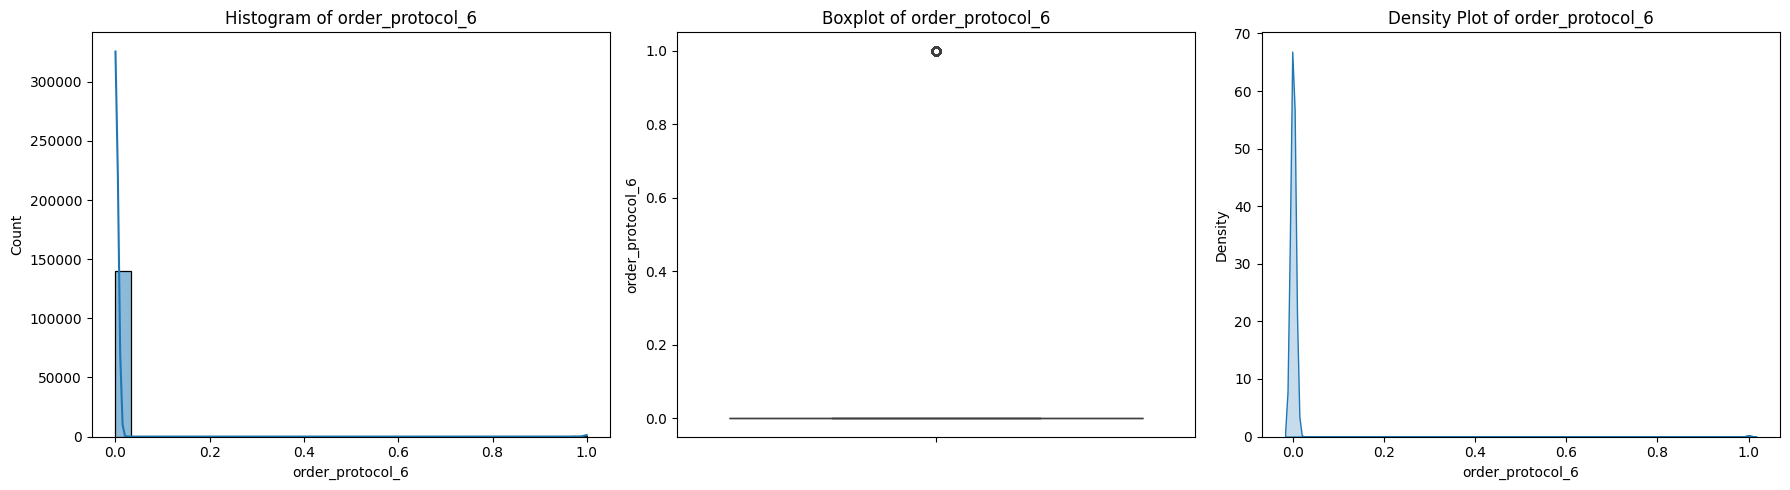

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column order_protocol_7
Plot saved to PDF!


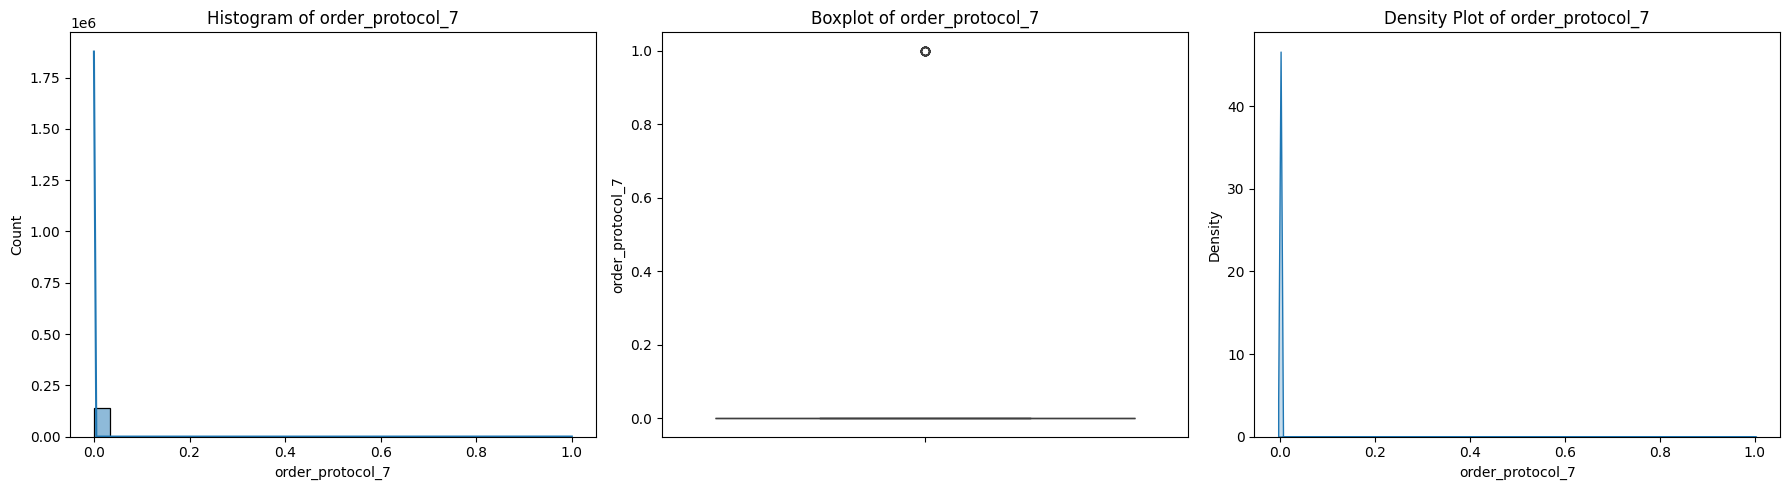

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column day_of_week_1
Plot saved to PDF!


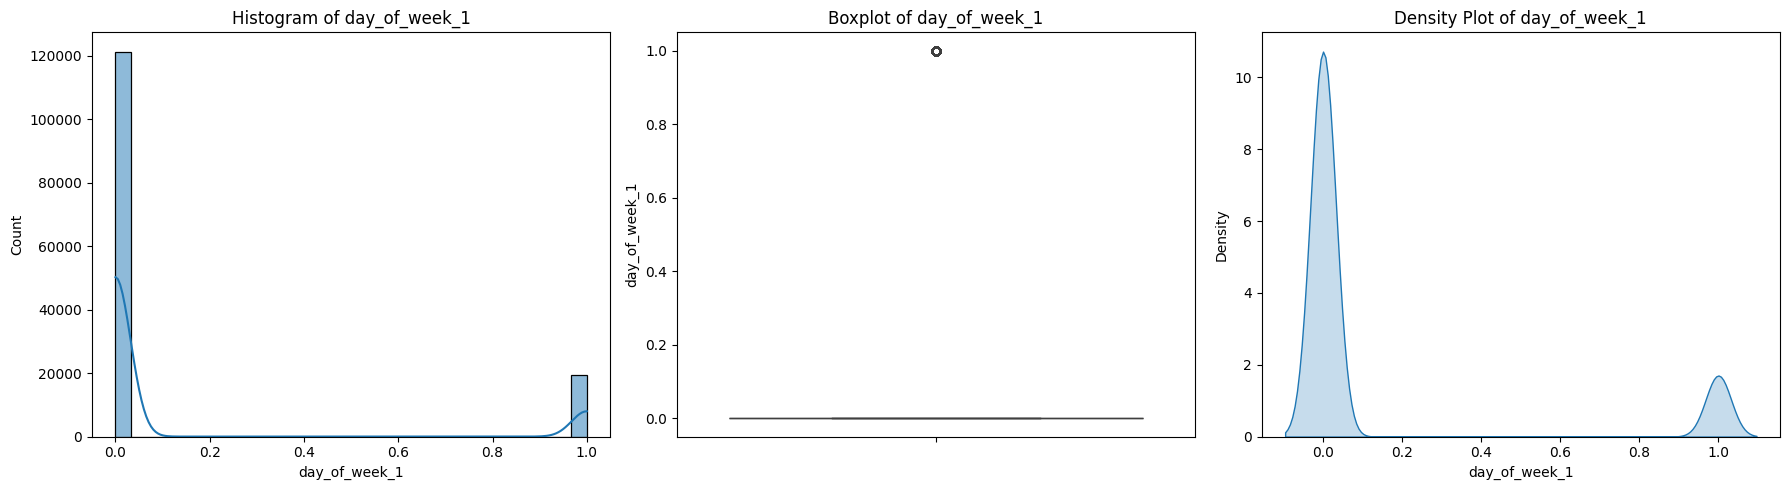

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column day_of_week_2
Plot saved to PDF!


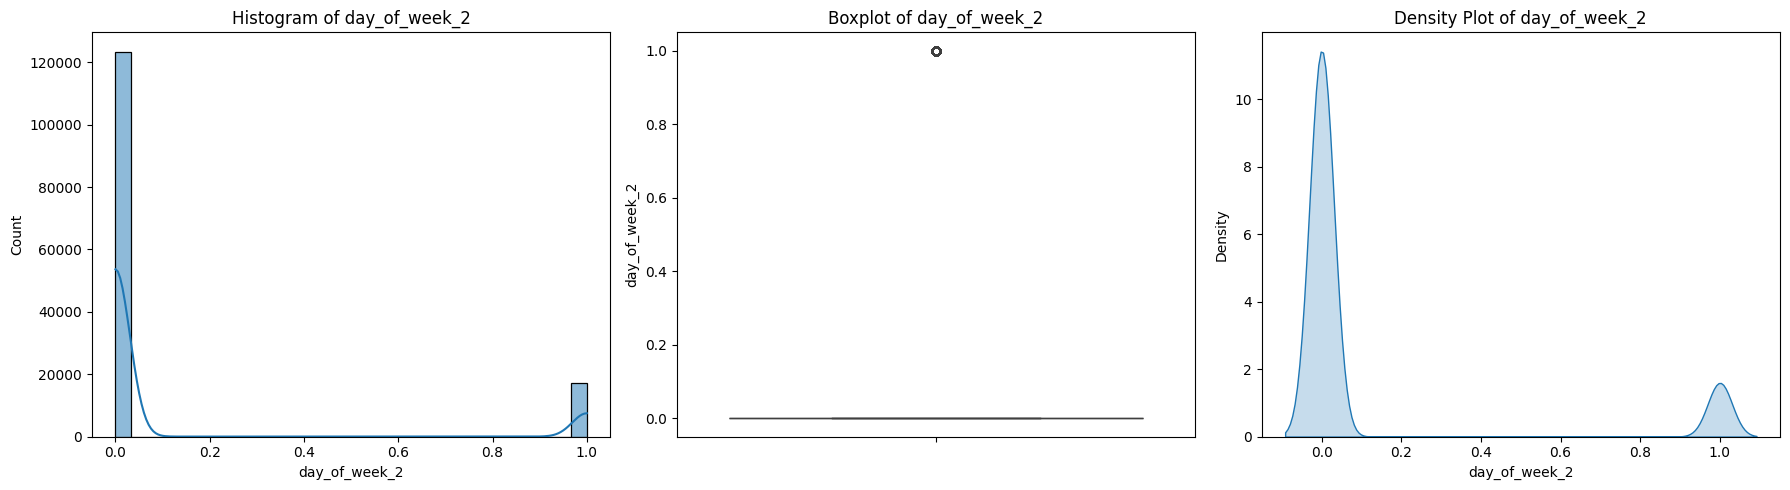

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column day_of_week_3
Plot saved to PDF!


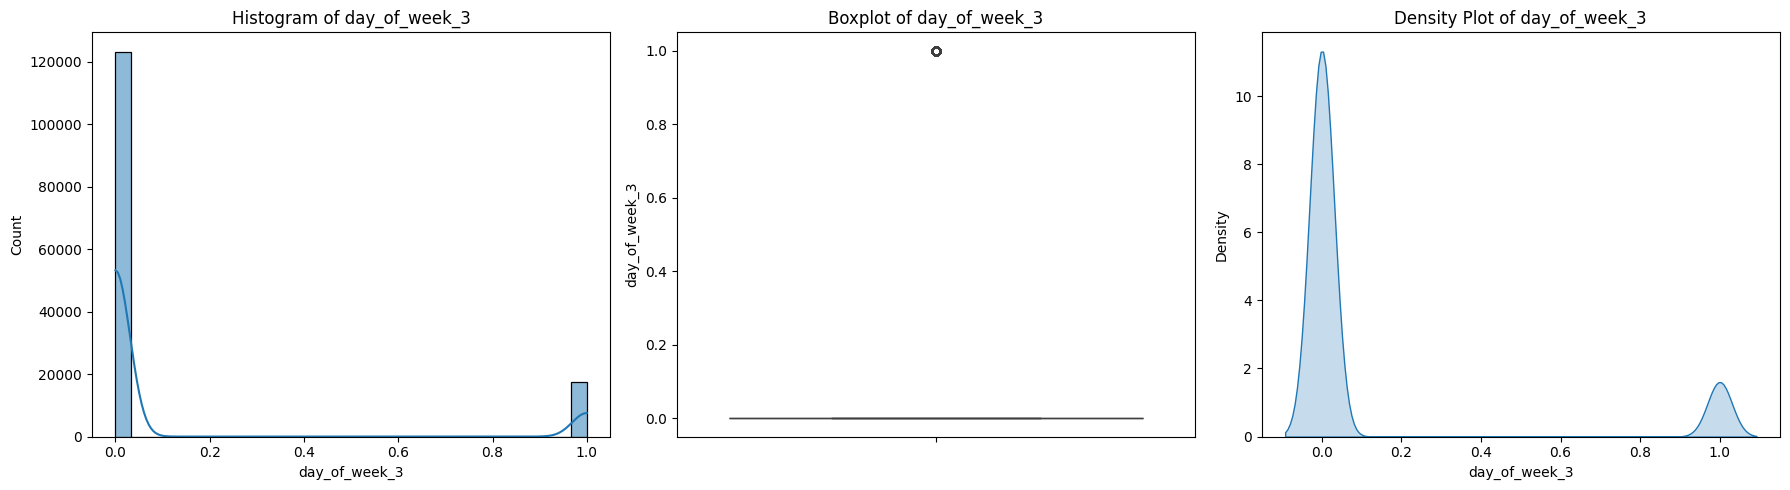

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column day_of_week_4
Plot saved to PDF!


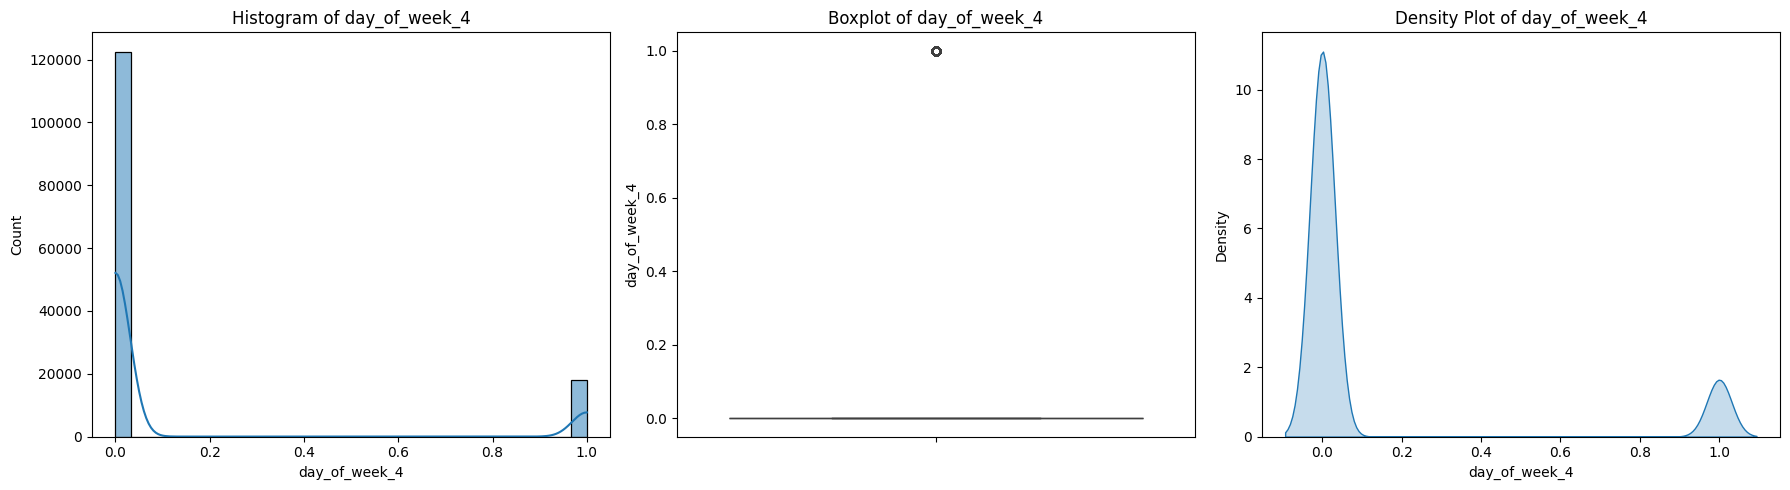

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column day_of_week_5
Plot saved to PDF!


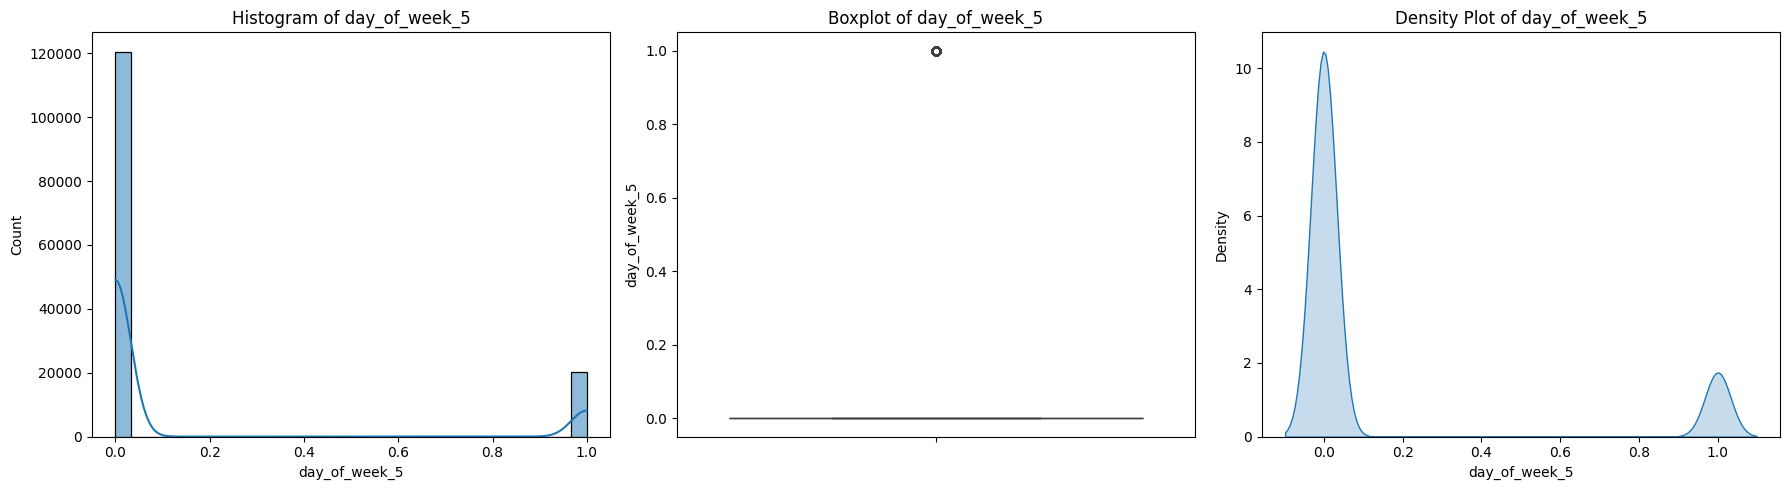

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column day_of_week_6
Plot saved to PDF!


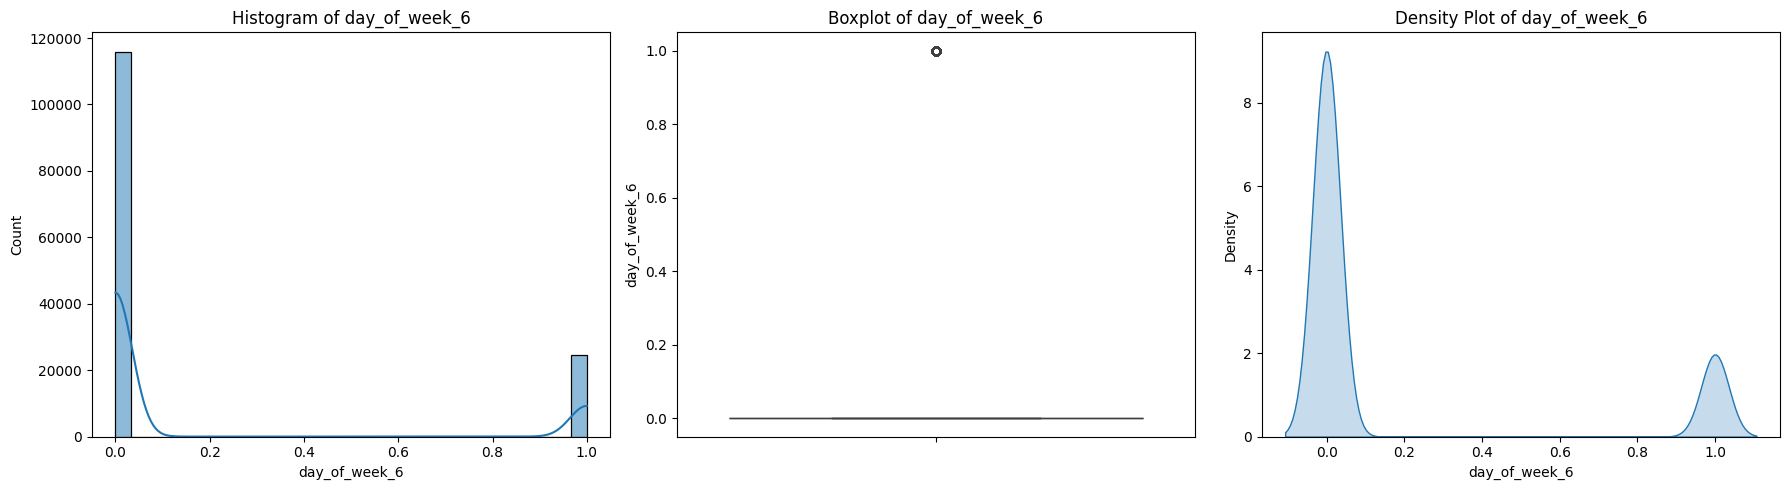

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot For column isWeekend_1
Plot saved to PDF!


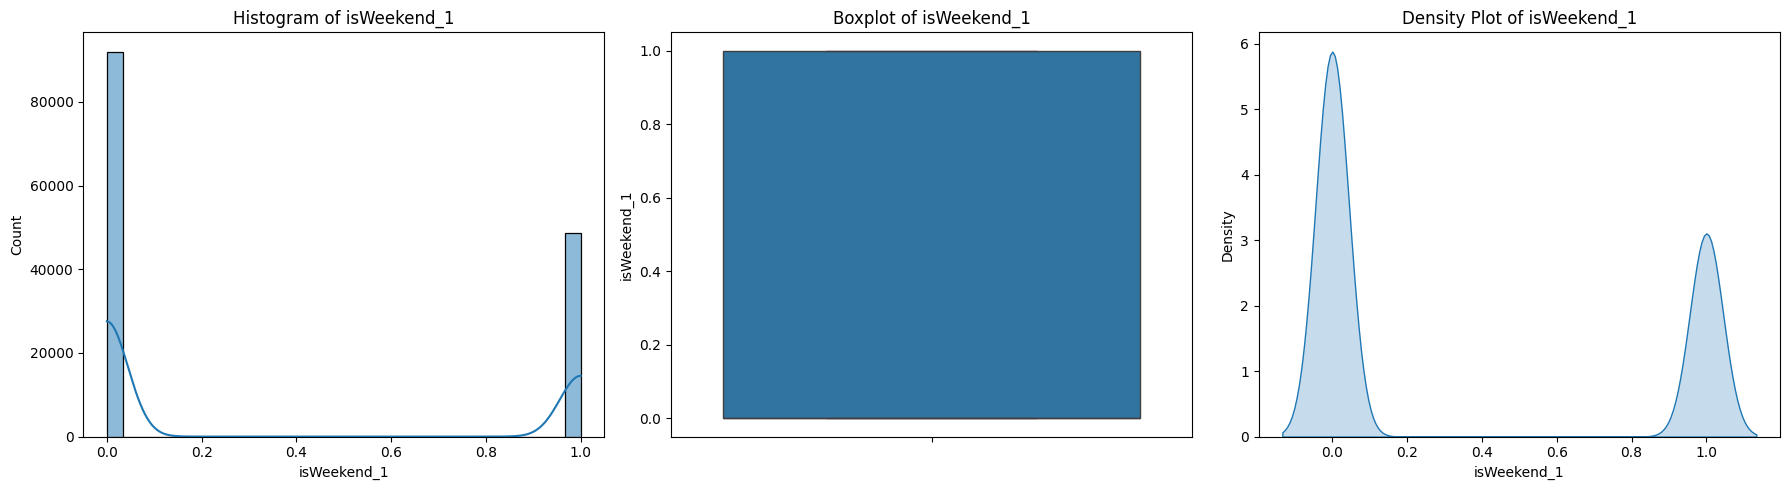

In [36]:
# Plot distributions for all numerical columns

# Plot for df_train (Before Handling Outlier)
plot_numeric_columns(X_train,"3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot")

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

##### categorical_columns = ["market_id", "order_protocol", "day_of_week", "month", "isWeekend"]

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_distribution(df, selected_columns, draw_plot):
    
    for col in selected_columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts())  # Print category counts
        
        if draw_plot == 'Y':
            fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1.2, 1.8]})
            
            # Countplot (smaller)
            sns.countplot(x=df[col], order=df[col].value_counts().index, palette="coolwarm", ax=axes[0])
            axes[0].set_title(f'Countplot of {col}')
            axes[0].set_xlabel(col)
            axes[0].set_ylabel("Count")
            axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility
            
            # Pie Chart (bigger)
            df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                            cmap="coolwarm", explode=[0.05]*df[col].nunique(), ax=axes[1])
            axes[1].set_title(f'Pie Chart of {col}')
            axes[1].set_ylabel("")  # Hide y-label for pie chart
            
            plt.tight_layout()
            
            save_plot_to_pdf(f"3.1.2 Showing Categorical values for {col} Only in Countplot, and Pie Chart Plot") # Save the plot to PDF
            plt.show()

# Define categorical columns for visualization
categorical_columns = ["market_id", "order_protocol", "day_of_week", "isWeekend"]


print("Plots created...")
# Run function with plotting
plot_categorical_distribution(X_train, categorical_columns, draw_plot='Y')


Plots created...

Column: market_id


KeyError: 'market_id'

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken

plt.figure(figsize=(18, 5))

# Histogram: Data Distribution
#plt.subplot(1, 3, 1)
sns.histplot(y_train["time_taken_minutes"], bins=100, kde=True)
plt.title(f'Histogram of {"time_taken_minutes"}')

#### Right Skewed

##### Check the Outliers in target

In [ ]:
def show_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
    
    # Visualize outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column} showing outliers')
    
    save_plot_to_pdf(" 3.1.3 Showing outliers in Box Plot Only")
    plt.show()

In [ ]:
show_outliers(y_train, "time_taken_minutes")

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

##### Scatterplot to show the relationship between all the Independent variables and Target

##### 1. Relationship between Target and Independent number variables

In [ ]:
# If y_train is a DataFrame with one column or an array (140621, 1)
# Convert it to 1D Series

# Define columns to exclude
#exclude_cols = ["market_id", "store_primary_category", "order_protocol", "day_of_week", "year", "month", "date", "weekday"]
exclude_cols = []

# Ensure target is 1D
if len(y_train.shape) > 1:
    y_train = y_train.squeeze()

# Scatter plots for all columns except excluded ones
for col in X_train.columns:
    if col not in exclude_cols:
        plt.figure(figsize=(8, 5))
        
        sns.scatterplot(x=X_train[col], y=y_train)
        
        plt.title(f'Scatter Plot: {col} vs Target (time_taken_minutes)', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('time_taken_minutes', fontsize=12)
        
        plt.grid(True)
        plt.tight_layout()
        plt.show()


##### From the above pairplot it seems that time_taken_minutes (target) has some sort of linear relationship with
- subtotal
- total_onshift_dashers
- total_busy_dashers
- total_outstanding_orders
- distance

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations of Input Features

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Plot a heatmap to display correlations of Input Features Vs Target

In [ ]:
# Plot the heatmap of the correlation matrix

# Checking the correlation between numeric columns

import matplotlib.pyplot as plt
import seaborn as sns

# First make sure target is 1D
if len(y_train.shape) > 1:
    y_train = y_train.squeeze()

# Exclude specified columns
exclude_cols = ["market_id", "store_primary_category", "order_protocol", "day_of_week", "weekday"] #"year", "month", "date"

# Create a temporary dataframe with selected columns + y_train
temp_df = X_train.drop(columns=exclude_cols, errors='ignore').copy()
temp_df['time_taken_minutes'] = y_train

# Only keep numeric columns
numeric_cols = temp_df.select_dtypes(include=['number']).columns

# Compute correlation matrix
corr = temp_df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap (Only for Selected Features + time_taken_minutes)', fontsize=18)
plt.show()

##### Checking the relationship between Continuous Target and Input Category features By Chisquare test
1. market_id
2. store_primary_category
3. order_protocol
4. isWeekend
5. created_hr_within

In [ ]:
X_train

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

#### Checking The  Correlation between Target and numerical Input features - We will frop less correlated features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If y_train is not Series, flatten it
if len(y_train.shape) > 1:
    y_train = y_train.squeeze()

# Create a temporary DataFrame combining X_train and y_train
temp_df = X_train.copy()
temp_df['time_taken_minutes'] = y_train

# Select only numeric columns for correlation
numeric_cols = temp_df.select_dtypes(include=['number']).columns

# Calculate correlation
corr = temp_df[numeric_cols].corr()

# Plot correlation with the target variable only
plt.figure(figsize=(12, 10))
sns.heatmap(corr[['time_taken_minutes']].sort_values(by='time_taken_minutes', ascending=False),
            cmap="YlGnBu", annot=True)

plt.title('Correlation of Features with time_taken_minutes', fontsize=18)
plt.show()


In [ ]:
# Drop 3-5 weakly correlated columns from training dataset
# Putting feature variable to X
X_train = X_train[['100X_distance','subtotal','total_outstanding_orders','num_distinct_items','max_item_price','total_items',
                   'total_busy_dashers','total_onshift_dashers','isWeekend','order_protocol','created_hr_within']]

# Putting response variable to y
#y = y_train


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [ ]:
def show_all_outliers(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number'])
    
    # Compute Q1, Q3, and IQR
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)
    
    # Count of outliers per column
    outlier_counts = outliers.sum()
    
    # Calculate percentage of outliers per column
    outlier_percentage = (outlier_counts / len(df)) * 100

    # Compute skewness for each column
    skewness_values = numeric_cols.skew()
    
    # Combine count and percentage into a DataFrame
    outlier_summary = pd.DataFrame({
        "Outlier Count": outlier_counts,
        "Outlier Percentage": outlier_percentage,
        "Skewness": skewness_values
    }).sort_values(by="Outlier Percentage", ascending=False)
    
    print("Outlier summary per column:\n", outlier_summary)
    
    # View rows containing outliers
    df_outliers = df[outliers.any(axis=1)]
    return df_outliers.head() #, outlier_summary

In [ ]:
show_all_outliers(X_train)

In [ ]:
# Boxplot for time_taken



##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

##### removing rows less than 5% outlier (IQR)

In [ ]:
import pandas as pd

def drop_low_outlier_rows(df, threshold=5, exclude_cols=[]):  #on all numeric columns
    
    # Select numeric columns, excluding specified ones
    numeric_cols = df.select_dtypes(include=["number"]).columns
    #numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in exclude_cols]
    df_numeric = df[numeric_cols]

    # Compute IQR
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers (Boolean mask)
    outliers = (df_numeric < lower_bound) | (df_numeric > upper_bound)

    # Compute outlier count & percentage before removal
    outlier_counts_before = outliers.sum()
    outlier_percent_before = (outlier_counts_before / len(df)) * 100  

    # Get columns where outlier percentage is < threshold
    cols_to_drop_outliers = outlier_percent_before[outlier_percent_before < threshold].index.tolist()

    if not cols_to_drop_outliers:
        print("\nNo columns have outliers below the threshold. Returning original DataFrame.")
        return df.copy()

    # Drop rows where any of these columns have outliers
    df_filtered = df[~outliers[cols_to_drop_outliers].any(axis=1)].copy()

    # Compute outlier percentage after removal
    df_numeric_filtered = df_filtered[numeric_cols]
    outliers_after = (df_numeric_filtered < lower_bound) | (df_numeric_filtered > upper_bound)
    outlier_counts_after = outliers_after.sum()
    outlier_percent_after = (outlier_counts_after / len(df_filtered)) * 100  
    skewness_after = df_numeric_filtered.skew()

    # Create summary table
    summary_df = pd.DataFrame({
        "Outlier Percentage Before": outlier_percent_before,
        "Number of Rows Before": len(df),
        "Outlier Percentage After": outlier_percent_after,
        "Number of Rows After": len(df_filtered),
        "Skewness After": skewness_after
    })

    # Print formatted summary table
    print("\nOutlier Summary Before and After Row Removal:\n")
    print(summary_df.to_string())

    return df_filtered

# Ordinal Columns to exclude from outlier removal
#exclude_cols = ["vendorid", "ratecodeid", "pulocationid", "dolocationid", "payment_type", "hour"]



In [ ]:
# Apply function and create new DF df_non_negative_drop_outlier
df_train_no_outlier = drop_low_outlier_rows(X_train, threshold=5, exclude_cols=exclude_cols)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

#### 

**5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [ ]:
X_train.head()

In [ ]:
y_train.head()

#### Feature Scaling By StandardScaler : mean ~ 0 and std deviation ~ 1.

In [ ]:
# Apply scaling to the numerical columns

##### Standardizing the feature before heatmap
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
'''
# List of numeric columns
num_vars = [
    'subtotal', 'num_distinct_items','total_outstanding_orders', '100X_distance'
    ,'total_items', 'max_item_price', 'total_onshift_dashers','total_busy_dashers','order_protocol','created_hr_within'
]
'''
# 1. Fit scaler on numeric columns only
#scaler.fit(X_train[num_vars])
scaler.fit(X_train)

# 2. Transform the numeric columns separately
#X_train[num_vars] = scaler.transform(X_train[num_vars])
#X_test[num_vars] = scaler.transform(X_test[num_vars])
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#####Checking the input feature parameters by Statmodels

In [ ]:
# Import libraries
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[X_train.columns]

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
X_train.head()

## Forward Method

##### Checking the correlation between input features

In [ ]:
#sns.heatmap(X_train.corr(), cmap="YlGnBu", annot = True)
#plt.show()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap (Only for Selected Features + time_taken_minutes)', fontsize=18)
plt.show()

##### Analysis: From this above graph it is clear that the below features are highly correlated (> 80%)
1. "total_outstanding_orders","total_onshift_dashers" and "total_busy_dashers"
2. "num_distinct_items", "total_items" (> 75%) and "subtotal" (67%) 

##### Cross checking with p-value

In [ ]:
X_train

In [ ]:
import statsmodels.api as sm

selected_cols = [
    'total_items', 'subtotal', 'num_distinct_items',
     'max_item_price', 'total_busy_dashers', 
    'total_outstanding_orders',
    'total_onshift_dashers',
    '100X_distance'
]

# Step 1: Subset X_train to only selected columns
X_train_selected = X_train[selected_cols]

# Step 1: Add a constant (intercept) to X_train
X_train_sm = sm.add_constant(X_train_selected)

# Step 2: Fit OLS (Ordinary Least Squares) model
lm = sm.OLS(y_train, X_train_sm).fit()

# Step 3: Get summary
print(lm.summary())


##### Finding Variance of Feature

In [ ]:
X_train_selected.var()

#### Forward Method (data set: X_train_fwd, Model : lmf): Adding 1st variable (1)

In [ ]:
import statsmodels.api as sm  

# Add a constant
X_train_fwd = sm.add_constant(X_train["100X_distance"])

# Create 1st model
lmf = sm.OLS(y_train,X_train_fwd).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lmf.summary())

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_fwd.columns
vif['VIF'] = [variance_inflation_factor(X_train_fwd.values, i) for i in range(X_train_fwd.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Check the parameters obtained

lmf.params

In [ ]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_fwd.iloc[:, 1], y_train)
plt.plot(X_train_fwd.iloc[:, 1], 46.188044 + 4.291097*X_train_fwd.iloc[:, 1], 'r') # putting the parameter values from above
plt.show()

#### Forward Method (data set: X_train_fwd, Model : lmf): Adding another variable (2)

In [ ]:
import statsmodels.api as sm  

# Add a constant
X_train_fwd = sm.add_constant(X_train[["100X_distance","subtotal"]])

# Create 1st model
lmf = sm.OLS(y_train,X_train_fwd).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lmf.summary())

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_fwd.columns
vif['VIF'] = [variance_inflation_factor(X_train_fwd.values, i) for i in range(X_train_fwd.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### Forward Method (data set: X_train_fwd, Model : lmf): Adding another variable (3)

In [ ]:
import statsmodels.api as sm  

# Add a constant
X_train_fwd = sm.add_constant(X_train[["100X_distance","subtotal","total_outstanding_orders"]])

# Create 1st model
lmf = sm.OLS(y_train,X_train_fwd).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lmf.summary())

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_fwd.columns
vif['VIF'] = [variance_inflation_factor(X_train_fwd.values, i) for i in range(X_train_fwd.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### Forward Method (data set: X_train_fwd, Model : lmf): Adding another variables (6)

In [ ]:
import statsmodels.api as sm  

# Add a constant
X_train_fwd = sm.add_constant(X_train[["100X_distance","subtotal",
                                      "total_outstanding_orders","total_onshift_dashers",
                                      "order_protocol","isWeekend"]])

# Create 1st model
lmf = sm.OLS(y_train,X_train_fwd).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lmf.summary())

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_fwd.columns
vif['VIF'] = [variance_inflation_factor(X_train_fwd.values, i) for i in range(X_train_fwd.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lmf.params

In [ ]:
y_train_fwd_pred= lmf.predict(X_train_fwd)
y_train_fwd_pred

### Residual Analysis of the train data

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_fwd_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
X_train_fwd # Optimised with selected feature as per trained model

In [ ]:
# Select same columns in X_test
# Take the same featured as in X_train_fwd , from X_test data set 
X_test_fwd = sm.add_constant(X_test[["100X_distance", "subtotal",
                                     "total_outstanding_orders", "total_onshift_dashers",
                                     "order_protocol", "isWeekend"]])


In [ ]:
# Make predictions

# Predict on test data
y_test_fwd_pred = lmf.predict(X_test_fwd)

In [ ]:
# Find results for evaluation metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_test_fwd_pred)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_test_fwd_pred))

# R-squared
r2 = r2_score(y_test, y_test_fwd_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


#### Visual Check Of The Model Performance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure y_test_pred is 1D
y_test_fwd_pred = y_test_fwd_pred.ravel()  # or use .squeeze()

# Same for y_test if needed
y_test = y_test.values.ravel()  # if it's a DataFrame or Series with shape (n,1)


plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_fwd_pred)
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

#####
1. Check p-value should be < 0.05 (significant value)
2. Check VIF should be < 5 (very less multi colinearity)

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[X_train.columns]

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
lmr = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [ ]:
#Let's see the summary of our linear model
print(lmr.summary())

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### 
N.B : High p-value means > 0.05 and High VIF means > 5
We could have
- High p-value, High VIF (Drop variables)
- High-Low
    - High p-value, Low VIF  1st remove variable with high p-value and rebuild the model and see the VIF value
    - Low p-value, High VIF  2nd Remove variable with high VIF
- Low p-value, Low VIF  (Keep variables)

### Loop through the number of features and test the model

#### 1st model : Removing total_busy_dashers

In [ ]:
X_train_new = X_train_rfe.drop(["total_onshift_dashers"], axis = 1)  
# total_busy_dashers .852,; total_outstanding_orders .480; total_onshift_dashers .720

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)

lmr = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lmr.summary())

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### 2nd model : Removing total_onshift_dashers

In [ ]:
X_train_new = X_train_rfe.drop(["total_busy_dashers"], axis = 1) # total_onshift_dashers 

import statsmodels.api as sm  
X_train_rfe4 = sm.add_constant(X_train_new)

lmr = sm.OLS(y_train,X_train_rfe4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lmr.summary())

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### 3rd model : Removing "subtotal","total_busy_dashers"

In [ ]:
# Create/Initialise the model
X_train_final = X_train_rfe.drop(["subtotal","total_busy_dashers"], axis = 1)

# Train the model using the training data

import statsmodels.api as sm  
X_train_final = sm.add_constant(X_train_final)

lmr = sm.OLS(y_train,X_train_final).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lmr.summary())

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lmr.params

##### Train the model

In [ ]:
y_train_rfe_pred = lmr.predict(X_train_final)

In [ ]:
# Loop through the number of features and test the model


In [ ]:
# Build the final model with selected number of features



## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram



##### Compute Residual (Distribution of Error)

In [ ]:
res = (y_train - y_train_rfe_pred)
res

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_rfe_pred', fontsize = 15)         # X-label
plt.show()

In [ ]:
# Select same columns in X_test
# Take the same featured as in X_train_fwd , from X_test data set 
X_test_rfe = sm.add_constant(X_test[["100X_distance", "total_outstanding_orders",
                                     "num_distinct_items", "max_item_price",
                                     "total_items", "isWeekend","order_protocol","created_hr_within"]])

In [ ]:
									 
# Make predictions

# Predict on test data
y_test_rfe_pred = lm.predict(X_test_rfe)

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model

In [ ]:
features_used = lm.params.index.drop("const")
X_unscaled_df = df_del_time[features_used]

##### 1. Get Scaled Coefficients

In [ ]:
X_train_final

In [ ]:
print(len(X_train_final.columns))   # Number of features (should be N)
print(len(lm.params))               # Should be N+1 because of intercept

In [ ]:
scaled_coeffs = pd.DataFrame({
    "Feature": lm.params.index[1:],  # Skip intercept
    "Scaled Coefficient": lm.params.values[1:]  # Skip intercept
})

##### 2. Compute Unscaled Coefficients: Unscaled Coef = Scaled Coef × (std_y / std_x)

In [ ]:
# std deviation of target
y_std = y_train.std()

# std deviation of features (unscaled)
X_std = X_train_unscaled[scaled_coeffs["Feature"]].std()

# Calculate unscaled coefficients
scaled_coeffs["Unscaled Coefficient"] = scaled_coeffs["Scaled Coefficient"] * (y_std / X_std.values)


##### 3. Compare Side-by-Sid

In [ ]:
# Sort by absolute importance
scaled_coeffs["Abs Unscaled Coef"] = scaled_coeffs["Unscaled Coefficient"].abs()
scaled_coeffs = scaled_coeffs.sort_values("Abs Unscaled Coef", ascending=False).drop(columns="Abs Unscaled Coef")

print(scaled_coeffs)


##### 4. Visualize Feature Impact

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=scaled_coeffs, x="Unscaled Coefficient", y="Feature", palette="coolwarm")
plt.title("Impact of Features on Delivery Time")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



#### Visualizing Predicted vs Actual Delivery Time

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
#sns.scatterplot(x=y_test, y=y_test_rfe_pred.flatten(), alpha=0.3)
sns.scatterplot(x=y_test, y=y_test_rfe_pred.values, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


r2 = r2_score(y_test, y_test_rfe_pred)

# Number of observations and predictors
n = X_test.shape[0]     # number of samples
p = X_test.shape[1]     # number of predictors (features)

# Adjusted R² formula
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")


# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_rfe_pred))
print(f"RMSE: {rmse:.2f} minutes")


In [ ]:
finalize_pdf()

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

1. isWeekend
From your coefficient analysis, it has the strongest positive impact on delivery time.

Inference: Deliveries on weekends are significantly slower, likely due to higher order volume or reduced driver availability.

2. order_protocol
Has a negative coefficient, meaning some protocols (like calls or in-app orders) reduce delivery time.

Inference: The way the order is placed impacts efficiency — perhaps in-app orders are quicker to process.

3. store_primary_category
Your earlier boxplots likely showed variation across categories (e.g., fast food might be quicker than full-service dining).

Inference: Type of restaurant impacts preparation time and thus total delivery time.

4. market_id
Geographic location could affect delivery dynamics — cities with heavy traffic or fewer dashers may lead to delays.

Inference: Some markets are consistently faster or slower, suggesting logistical or regional challenges.

5. day_of_week
Often, certain weekdays (like Fridays or Mondays) show trends — possibly longer times before/after weekends.

Inference: Delivery time fluctuates by weekday — useful for resource planning.

---
Inference:
One-hot encode variables like store_primary_category or market_id before modeling.


##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Feature	Correlation	Interpretation
subtotal	                0.41	Larger orders (in terms of price) tend to take more time, possibly due to prep time.
total_outstanding_orders	0.38	More pending orders at the time of ordering → longer delivery times.
num_distinct_items	        0.31	More variety in the order might lead to more prep complexity.
max_item_price	            0.25	May reflect premium or time-consuming items.

---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

I used IQR clipping to handle outlier with below boundaries.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

As the Outlier data not more than 4.9% in any case, we are clipping insted of capping.
---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


Linear regression is a supervised learning algorithm used for predicting a continuous target variable (Feature) based on one or more input features. It models the linear relationship between the dependent variable (target) and one or more independent variables (features).
The targer value more or less predicted by linear equation with getting the coefficient and intercept value after training the model by train data.

There are 2 types of linear regression
1. Simple Linear Regression – One independent variable
2. Multiple Linear Regression – Multiple independent variables

We need to do some assumptions
-- Linearity – Relationship between X and y is linear.
-- Independence – Observations are independent.
-- Homoscedasticity – Constant variance of residuals.
-- Normality of Residuals – Residuals should be normally distributed.
-- No Multicollinearity – Features shouldn't be highly correlated with each other.
---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

Aspect	                                          Simple Linear Regression	                Multiple Linear Regression
Number of Features	                                     One	                                    Two or more
Complexity	                                        Less complex	                                More complex
Visual Representation	                         Line on a 2D plot	               Plane or hyperplane in multidimensional space
Interpretation	                                         Easy	                    Requires interpretation of multiple effects
Risk of Multicollinearity	                        Not applicable	                               Can be an issue

---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>
In Linear Regression, the most commonly used cost function is: MSE (Mean Square Error)
>
>We minimize the cost function to find the optimal model parameters (intercept and coefficients). This is typically done in two ways:
>Analytical Method (Normal Equation)
>Optimization Method (Gradient Descent)



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>                            Underfitting	                                                                    Overfitting
Definition	      Model is too simple to capture patterns	                                      Model is too complex, captures noise
Training error	                 High	                                                                          Very low
Testing error	                 High	                                                                             High
Bias	                         High	                                                                              Low
Variance	                     Low	                                                                              High
Example	                Linear model on non-linear data	                                             High-degree polynomial on simple data




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>A residual is the difference between the actual and predicted value:  Yactual - Y predicted
>A residual plot shows these residuals on the y-axis and the predicted values (or an independent variable) on the x-axis.
>
>If the linear regression model is appropriate:
-- The residuals should be randomly scattered around zero.
-- There should be no clear pattern.
-- The spread (variance) of residuals should be roughly constant — this is called homoscedasticity.

